In [718]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import pydotplus
from IPython.display import Image
import collections
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import chi2_contingency
import re
import datetime as dt

In [719]:
df = pd.read_excel('C:/Users/sumit/Sumit DATA/datasets/Project/train.xlsx')

In [720]:
df.head(20).T

,train,train,train,train,train,train,train,train,train,train,train,train,train,train,train,train,train,train,train,train
ID,203097,579905,810601,267447,343523,1027655,947847,912934,552574,1203363,87291,190393,606655,431800,1279958,536517,1087625,874596,711342,466888
Salary,420000,500000,325000,1100000,200000,300000,300000,400000,600000,230000,600000,450000,270000,200000,300000,350000,325000,250000,120000,325000
DOJ,2012-06-01 00:00:00,2013-09-01 00:00:00,2014-06-01 00:00:00,2011-07-01 00:00:00,2014-03-01 00:00:00,2014-06-01 00:00:00,2014-08-01 00:00:00,2014-07-01 00:00:00,2013-07-01 00:00:00,2014-07-01 00:00:00,2011-04-01 00:00:00,2011-08-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2014-09-01 00:00:00,2013-08-01 00:00:00,2014-01-01 00:00:00,2014-09-01 00:00:00
DOL,present,present,present,present,2015-03-01 00:00:00,present,2015-05-01 00:00:00,2015-07-01 00:00:00,present,present,2015-04-01 00:00:00,2014-10-01 00:00:00,present,present,present,present,present,2014-09-01 00:00:00,2014-06-01 00:00:00,present
Designation,senior quality engineer,assistant manager,systems engineer,senior software engineer,get,system engineer,java software engineer,mechanical engineer,electrical engineer,project engineer,senior php developer,senior systems engineer,quality assurance engineer,qa analyst,java software engineer,network engineer,product development engineer,associate software developer,data entry operator,software engineer
JobCity,Bangalore,Indore,Chennai,Gurgaon,Manesar,Hyderabad,Banglore,Bangalore,Noida,Kolkata,Bangalore,Pune,Pune,Gurgaon,Bangalore,-1,Noida,Gurgaon,Gurgaon,Pune
Gender,f,m,f,m,m,m,m,m,m,m,m,m,m,m,m,f,m,m,m,f
DOB,1990-02-19 00:00:00,1989-10-04 00:00:00,1992-08-03 00:00:00,1989-12-05 00:00:00,1991-02-27 00:00:00,1992-07-02 00:00:00,1993-02-01 00:00:00,1992-05-27 00:00:00,1991-09-17 00:00:00,1993-06-13 00:00:00,1989-06-24 00:00:00,1990-02-10 00:00:00,1990-11-21 00:00:00,1990-10-23 00:00:00,1992-07-02 00:00:00,1990-01-17 00:00:00,1992-06-10 00:00:00,1987-09-28 00:00:00,1992-12-07 00:00:00,1990-11-30 00:00:00
10percentage,84.3,85.4,85,85.6,78,89.92,86.08,92,90,77,88.6,81,83.6,60.8,81.2,69.54,85.8,60.8,65,79
10board,"board ofsecondary education,ap",cbse,cbse,cbse,cbse,state board,state board,cbse,cbse,cbse,mp board bhopal,cbse,state board,cbse,state board,icse,cbse,cbse,state board,cbse


In [721]:
df['ID'].nunique()

3998

In [722]:
df['DOL'] = df['DOL'].replace('present','2015-12-31 00:00:00')
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,2015-12-31 00:00:00,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,2015-12-31 00:00:00,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,2015-12-31 00:00:00,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,2015-12-31 00:00:00,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [723]:
df['DOL'] = pd.to_datetime(df.DOL, format='%Y-%m-%d')

In [724]:
df= df.reset_index()

In [725]:
df = df.drop(['index'],axis = 1)

In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
ID                       3998 non-null int64
Salary                   3998 non-null int64
DOJ                      3998 non-null datetime64[ns]
DOL                      3998 non-null datetime64[ns]
Designation              3998 non-null object
JobCity                  3998 non-null object
Gender                   3998 non-null object
DOB                      3998 non-null datetime64[ns]
10percentage             3998 non-null float64
10board                  3998 non-null object
12graduation             3998 non-null int64
12percentage             3998 non-null float64
12board                  3998 non-null object
CollegeID                3998 non-null int64
CollegeTier              3998 non-null int64
Degree                   3998 non-null object
Specialization           3998 non-null object
collegeGPA               3998 non-null float64
CollegeCityID            3998 non-null int6

In [727]:
df['Domain'] = df['Domain'].replace(-1,0)

### Data Cleaning - JobCity Column

In [728]:
clean_data = df.copy()

In [729]:
clean_data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [730]:
def clean_city(x):
    if len(re.findall('^b[a,e].+',str(x)))>0 or x == 'asifabadbanglore':
        return 'bangalore'
    elif len(re.findall('^ko.+[i,n]$',str(x))) > 0:
        return 'kochi' 
    elif len(re.findall('^hyderabad',str(x))) > 0:
        return 'hyderabad'
    elif len(re.findall('kolkata',str(x))) > 0:
        return 'kolkata'
    elif len(re.findall('^vi[s,z]',str(x)))>0 or x == 'vsakhapttnam':
        return 'visakhapatnam'
    elif len(re.findall('no[i,u].+a',str(x))) > 0:
        return 'noida'
    elif x == 'sadulpur,rajgarh,distt-churu,rajasthan':
        return 'sadulpur'
    elif len(re.findall('lat.*',str(x)))>0:
        return 'latur'
    elif len(re.findall('^pu.*[e,r]$',str(x))) > 0:
        return 'pune'
    elif len(re.findall('^kal.*r',str(x))) > 0:
        return 'kalmar'
    elif len(re.findall('^p[o,u]nd.+',str(x))) > 0:
        return 'pondicherry'
    elif len(re.findall('^am.+',str(x))) > 0:
        return 'ambala'
    elif len(re.findall('^al ',str(x))) > 0:
        return 'al jubail'
    elif len(re.findall('^je.+',str(x))) > 0:
        return 'jeddah'
    elif len(re.findall('^met',str(x))) > 0:
        return 'mettur'
    elif len(re.findall('^ray.+',str(x))) > 0:
        return 'rayagada'
    elif len(re.findall('drum$',str(x))) > 0:
        return 'trivandrum'
    elif len(re.findall('bhub.*',str(x)))>0:
        return 'bhubaneswar'
    elif len(re.findall('g[h,a].+ad$',str(x).lower())) > 0:
        return 'ghaziabad'
    elif len(re.findall('^g[h,a].+ar$',str(x).lower())) > 0:
        return 'gandhi nagar'
    elif len(re.findall('^gur',str(x).lower())) > 0:
        return 'gurgaon'
    else:
        return str(x).strip()

In [731]:
df['JobCity'].nunique()

339

In [732]:
clean_data['JobCity'] = clean_data['JobCity'].str.lower()

In [733]:
clean_data['JobCity'].apply(clean_city).nunique()

195

In [734]:
#bengaluru,banagalore,banagalore
clean_data['JobCity'] = clean_data['JobCity'].apply(clean_city)

In [735]:
for x in clean_data['JobCity'].unique():
    if len(re.findall('ghazi',str(x).lower())) > 0:
        print(x)

ghaziabad


al jubail,saudi arabia - kalmar, sweden - jeddah saudi arabia - 'kala amb' - mettur, tamil nadu - pondi' - rayagada, odisha - punr - delhi/ncr - bihar - pondy - latur (maharashtra ) - mainpuri - haryana - 

In [737]:
for i in clean_data['JobCity'].unique():
    if len(re.findall('drum$',str(i).lower())) > 0:
        print(i)

trivandrum


In [738]:
clean_data[clean_data['JobCity']=='Kalmar, Sweden`']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience


In [739]:
for i in df['JobCity'].unique():
    if len(re.findall('^ra',str(i).lower())) > 0:
        print(i)

Rajkot
raipur
Raigarh
Ranchi
Rajasthan
Raipur
Ratnagiri
Rayagada, Odisha
Ranchi 
RAS AL KHAIMAH
RAE BARELI
ranchi
Rajpura


In [740]:
clean_data['JobCity'].nunique()

195

In [741]:
df[df['JobCity'] == 'new delhi - jaisalmer']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
218,543139,110000,2014-04-01,2014-06-01,engineer,new delhi - jaisalmer,m,1990-11-06,66.8,cbse,...,-1,-1,-1,-1,-1,-1.4606,-0.2793,-0.9245,1.0611,-0.7615


In [742]:
clean_data['JobCity'].unique()

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'noida', 'kolkata', 'pune', 'nan', 'mohali', 'jhansi',
       'delhi', 'bhubaneswar', 'navi mumbai', 'mumbai', 'new delhi',
       'mangalore', 'rewari', 'ghaziabad', 'bhiwadi', 'mysore', 'rajkot',
       'jaipur', 'thane', 'maharajganj', 'thiruvananthapuram',
       'punchkula', 'coimbatore', 'dhanbad', 'lucknow', 'trivandrum',
       'gandhi nagar', 'una', 'daman and diu', 'visakhapatnam', 'nagpur',
       'bhagalpur', 'new delhi - jaisalmer', 'ahmedabad', 'kochi',
       'kanpur', 'vijayawada', 'alwar', 'siliguri', 'raipur', 'bhopal',
       'faridabad', 'jodhpur', 'udaipur', 'muzaffarpur', 'bulandshahar',
       'haridwar', 'raigarh', 'jabalpur', 'unnao', 'dehradun', 'rudrapur',
       'jamshedpur', 'dharamshala', 'hissar', 'ranchi', 'madurai',
       'chandigarh', 'australia', 'cheyyar', 'sonepat', 'pantnagar',
       'jagdalpur', 'angul', 'ariyalur', 'jowai',
       'kochi/cochin, chennai and coimb

In [743]:
df = clean_data

In [744]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,2015-12-31,senior quality engineer,bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,2015-12-31,assistant manager,indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,2015-12-31,systems engineer,chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01,get,manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Data Cleaning - 10 board  

In [745]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [746]:
def board(x):
    if re.findall('cbse',str(x))or re.findall('^central board of secondary education.*',str(x))or x =='aisse' or re.findall('national',str(x)) or x == 'jawahar navodaya vidyalaya' or re.findall('^dav',str(x)) or x == 'cbsc' or re.findall('^gyan',str(x)) or re.findall('public',str(x)):
        return 'CBSE'
    elif re.findall('icse',str(x)) or x == 'council for indian school certificate examination' or re.findall('cluny',str(x)) or re.findall('^stmary',str(x)):
        return 'ICSE'
    elif x == 0 or re.findall('^m[a,e]t.*',str(x)) or x == 'certificate of middle years program of ib' or x== 'mirza ahmed ali baig' or re.findall('angl',str(x)) or re.findall('^sarad',str(x)) or re.findall('^holy',str(x)) or x == 'ksbe':
        return 'Unknown'
    else:
        return 'State Board'

In [747]:
df['10board'] = df['10board'].apply(board)

In [748]:
for x in df['10board']:
    if len(re.findall('public',str(x)))>0:
        print(x)

In [749]:
df['10board'].unique()

array(['State Board', 'CBSE', 'ICSE', 'Unknown'], dtype=object)

In [750]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,2015-12-31,senior quality engineer,bangalore,f,1990-02-19,84.3,State Board,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,2015-12-31,assistant manager,indore,m,1989-10-04,85.4,CBSE,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,2015-12-31,systems engineer,chennai,f,1992-08-03,85.0,CBSE,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,m,1989-12-05,85.6,CBSE,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01,get,manesar,m,1991-02-27,78.0,CBSE,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


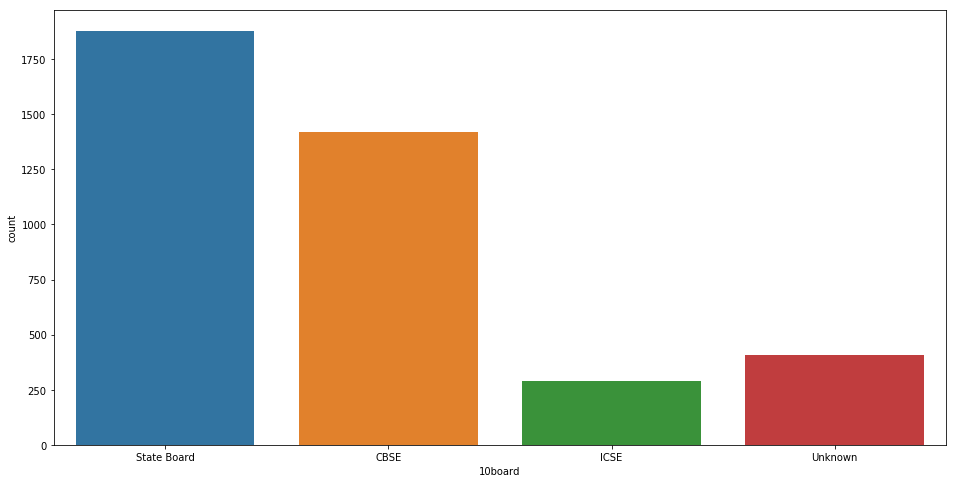

In [751]:
plt.figure(figsize=(16,8))
sns.countplot(df['10board'])
plt.show()

### Data Cleaning - 12th board

In [752]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [753]:
def board(x):
    if re.findall('^cbe',str(x)) or re.findall('^jaswa',str(x)) or re.findall('^ssm',str(x)) or re.findall('^dav',str(x)) or re.findall('^jay',str(x)) or re.findall('nios',str(x)) or re.findall('pre',str(x)) or re.findall('cbse',str(x))or re.findall('^central board of secondary education.*',str(x))or x =='aisse' or re.findall('^all india.*',str(x)):
        return 'CBSE'
    elif re.findall('^isc.*',str(x)) or re.findall('^icse.*',str(x)) or x == 'cicse' or x == 'isc' or x == 'council for indian school certificate examination':
        return 'ICSE'
    elif re.findall('^luck',str(x)) or re.findall('^mpc',str(x)) or re.findall('^sci',str(x)) or re.findall('sankara',str(x)) or re.findall('apsb',str(x)) or re.findall('st jos',str(x)) or re.findall('elec.*',str(x)) or re.findall('^sbtet.*',str(x)) or x == 'ibe' or re.findall('^sda.*',str(x)) or x == 0 or re.findall('metric.*',str(x)) or re.findall('^mat.*',str(x)) or re.findall('^internat.*',str(x)):
        return 'Unknown'
    else:
        return 'State Board'

In [754]:
df['12board'] = df['12board'].apply(board)

In [755]:
for x in df['12board']:
    if len(re.findall('^cbse bo',str(x)))>0:
        print(x)

In [756]:
df['12board'].unique()

array(['State Board', 'CBSE', 'ICSE', 'Unknown'], dtype=object)

In [757]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,2015-12-31,senior quality engineer,bangalore,f,1990-02-19,84.3,State Board,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,2015-12-31,assistant manager,indore,m,1989-10-04,85.4,CBSE,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,2015-12-31,systems engineer,chennai,f,1992-08-03,85.0,CBSE,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,m,1989-12-05,85.6,CBSE,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01,get,manesar,m,1991-02-27,78.0,CBSE,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


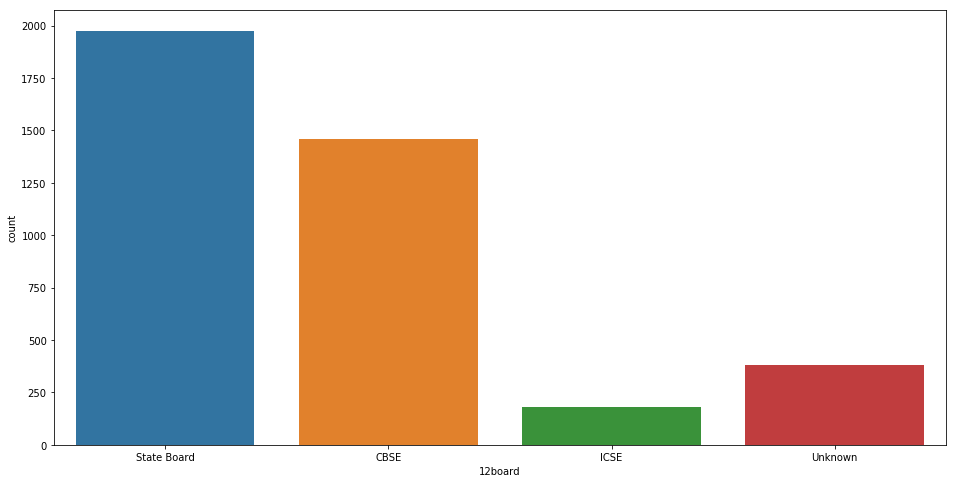

In [758]:
plt.figure(figsize=(16,8))
sns.countplot(df['12board'])
plt.show()

### Data Cleaning - Specialisation exams

In [759]:
df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
     'ElectricalEngg', 'TelecomEngg', 'CivilEngg']] = df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
     'ElectricalEngg', 'TelecomEngg', 'CivilEngg']].replace({-1:np.nan})

In [760]:
df['Aggregate Mean Marks'] = df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience',
                              'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg']].T.mean()

In [761]:
df['Aggregate Max Marks'] = df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience',
                              'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg']].T.max()

In [762]:
df['Aggregate Min Marks'] = df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience',
                              'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg']].T.min()

In [763]:
df[['Aggregate Mean Marks','Aggregate Max Marks','Aggregate Min Marks']] = df[['Aggregate Mean Marks','Aggregate Max Marks','Aggregate Min Marks']].replace(np.nan,0)

In [764]:
main = df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience','MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg']]
main = main.T

In [765]:
x = []
y = []
z = []
for i in main:
    for j in main.iloc[:,i]:
        x.append(j)
for l in range(0,len(main.columns)):
    for k in main.index:
        y.append(k)
for k in main:
    z.append(k)
    z.append(k)
    z.append(k)
    z.append(k)
    z.append(k)
    z.append(k)
    z.append(k)
grat = pd.DataFrame({'ID':z,'Subject':y,'Marks':x})
grat.dropna(inplace=True)
grat.reset_index(inplace = True)
grat.drop('index',inplace = True,axis = 1)

In [766]:
grat

,ID,Subject,Marks
0,0,ComputerProgramming,445.0
1,1,ElectronicsAndSemicon,466.0
2,2,ComputerProgramming,395.0
3,3,ComputerProgramming,615.0
4,4,ElectronicsAndSemicon,233.0
5,5,ComputerProgramming,645.0
6,5,ComputerScience,407.0
7,6,ComputerProgramming,405.0
8,6,ComputerScience,346.0
9,7,MechanicalEngg,469.0


### Data Cleaning - Age and Gap

In [767]:
dob = df.copy

In [768]:
dob= pd.DataFrame()
dob= df[['Salary','Gender','DOB','12graduation','GraduationYear','DOJ']]
dob['DOB'] = pd.to_datetime(dob['DOB']) 
dob['DOB'] = dob['DOB'].dt.year
dob['DOJ'] = dob['DOJ'].dt.year
dob['current date']=2015
dob['age'] = dob['current date'] - dob['DOB']
dob['gap1'] = dob['GraduationYear'] - dob['12graduation']
dob['age @ 12th'] = dob['12graduation'] - dob['DOB']
dob.head()

,Salary,Gender,DOB,12graduation,GraduationYear,DOJ,current date,age,gap1,age @ 12th
0,420000,f,1990,2007,2011,2012,2015,25,4,17
1,500000,m,1989,2007,2012,2013,2015,26,5,18
2,325000,f,1992,2010,2014,2014,2015,23,4,18
3,1100000,m,1989,2007,2011,2011,2015,26,4,18
4,200000,m,1991,2008,2012,2014,2015,24,4,17


In [769]:
k=[]
x=0
dob['Degree']=df.Degree
for i in dob.Degree:
    if i== 'B.Tech/B.E.':
        x=4
        k.append(x)
    elif i== 'MCA' or 'M.Sc. (Tech.)':
        x=6
        k.append(x)
    elif i== 'M.Tech./M.E.':
        x=6
        k.append(x)
dob['gap2'] = pd.DataFrame(k)
dob['GAP_in_Grad'] = dob['gap1'] - dob['gap2']
dob.GAP_in_Grad.unique()

array([    0,     1,     2,     4,    -1,    12,     3,    -3,    -2,
           5,     6,    -4, -2014,     7], dtype=int64)

In [770]:
for i in dob.GAP_in_Grad:
    if i== -2014 :
        dob.GAP_in_Grad = dob.GAP_in_Grad.replace(i,0)
    elif i== -1:
        dob.GAP_in_Grad = dob.GAP_in_Grad.replace(i,0)
    elif i== -2:
        dob.GAP_in_Grad = dob.GAP_in_Grad.replace(i,0)
    elif i== -3:
        dob.GAP_in_Grad = dob.GAP_in_Grad.replace(i,0)
    elif i== -4:
        dob.GAP_in_Grad = dob.GAP_in_Grad.replace(i,0)

dob.GAP_in_Grad.unique()

array([ 0,  1,  2,  4, 12,  3,  5,  6,  7], dtype=int64)

In [771]:
dob.head(10)

,Salary,Gender,DOB,12graduation,GraduationYear,DOJ,current date,age,gap1,age @ 12th,Degree,gap2,GAP_in_Grad
0,420000,f,1990,2007,2011,2012,2015,25,4,17,B.Tech/B.E.,4,0
1,500000,m,1989,2007,2012,2013,2015,26,5,18,B.Tech/B.E.,4,1
2,325000,f,1992,2010,2014,2014,2015,23,4,18,B.Tech/B.E.,4,0
3,1100000,m,1989,2007,2011,2011,2015,26,4,18,B.Tech/B.E.,4,0
4,200000,m,1991,2008,2012,2014,2015,24,4,17,B.Tech/B.E.,4,0
5,300000,m,1992,2010,2014,2014,2015,23,4,18,B.Tech/B.E.,4,0
6,300000,m,1993,2010,2014,2014,2015,22,4,17,B.Tech/B.E.,4,0
7,400000,m,1992,2010,2016,2014,2015,23,6,18,B.Tech/B.E.,4,2
8,600000,m,1991,2009,2013,2013,2015,24,4,18,B.Tech/B.E.,4,0
9,230000,m,1993,2010,2014,2014,2015,22,4,17,B.Tech/B.E.,4,0


In [772]:
def changes(x):
    if x == 0:
        return 2014
    else:
        return x

In [773]:
dob['GraduationYear'] = dob['GraduationYear'].apply(changes)

In [774]:
dob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 13 columns):
Salary            3998 non-null int64
Gender            3998 non-null object
DOB               3998 non-null int64
12graduation      3998 non-null int64
GraduationYear    3998 non-null int64
DOJ               3998 non-null int64
current date      3998 non-null int64
age               3998 non-null int64
gap1              3998 non-null int64
age @ 12th        3998 non-null int64
Degree            3998 non-null object
gap2              3998 non-null int64
GAP_in_Grad       3998 non-null int64
dtypes: int64(11), object(2)
memory usage: 406.1+ KB


In [775]:
dob['GAP_after_Grad'] = dob['DOJ'] - dob['GraduationYear']

In [776]:
dob['GAP_after_Grad'].head()

0    1
1    1
2    0
3    0
4    2
Name: GAP_after_Grad, dtype: int64

In [777]:
for i in dob.GAP_after_Grad:
    if i== 2014 :
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)
    elif i== -1:
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)
    elif i== -2:
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)
    elif i== -3:
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)
    elif i== -4:
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)
    elif i== -5:
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)
    elif i== -6:
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)
    elif i== -7:
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)
    elif i== -8:
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)
    elif i== -22:
        dob.GAP_after_Grad = dob.GAP_after_Grad.replace(i,0)

In [778]:
dob['GAP_after_Grad'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [779]:
dob['12graduation'].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 1995, 2004, 2012, 2003,
       2002, 2001, 1998, 2013, 1999], dtype=int64)

In [780]:
dob.shape

(3998, 14)

In [781]:
dob = dob[dob['12graduation']>2002]

In [782]:
dob.shape

(3979, 14)

In [783]:
df['GAP_after_Grad']=dob['GAP_after_Grad']

In [784]:
df['GAP_in_Grad']=dob['GAP_in_Grad']

In [785]:
df['Age']=dob['age']

In [786]:
df['GraduationYear'] = dob['GraduationYear']

In [787]:
df['12graduation'] = dob['12graduation']

In [788]:
df.dropna(subset=['12graduation'],inplace=True)

In [789]:
df.shape

(3979, 44)

In [790]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3979 entries, 0 to 3997
Data columns (total 44 columns):
ID                       3979 non-null int64
Salary                   3979 non-null int64
DOJ                      3979 non-null datetime64[ns]
DOL                      3979 non-null datetime64[ns]
Designation              3979 non-null object
JobCity                  3979 non-null object
Gender                   3979 non-null object
DOB                      3979 non-null datetime64[ns]
10percentage             3979 non-null float64
10board                  3979 non-null object
12graduation             3979 non-null float64
12percentage             3979 non-null float64
12board                  3979 non-null object
CollegeID                3979 non-null int64
CollegeTier              3979 non-null int64
Degree                   3979 non-null object
Specialization           3979 non-null object
collegeGPA               3979 non-null float64
CollegeCityID            3979 non-null in

In [791]:
df['12graduation']

0       2007.0
1       2007.0
2       2010.0
3       2007.0
4       2008.0
5       2010.0
6       2010.0
7       2010.0
8       2009.0
9       2010.0
10      2006.0
11      2007.0
12      2008.0
13      2008.0
14      2008.0
15      2008.0
16      2010.0
17      2006.0
18      2008.0
19      2008.0
20      2006.0
21      2007.0
22      2009.0
23      2006.0
24      2010.0
25      2008.0
26      2006.0
27      2009.0
28      2011.0
29      2010.0
         ...  
3968    2008.0
3969    2009.0
3970    2009.0
3971    2007.0
3972    2010.0
3973    2008.0
3974    2008.0
3975    2009.0
3976    2010.0
3977    2007.0
3978    2009.0
3979    2006.0
3980    2004.0
3981    2009.0
3982    2006.0
3983    2009.0
3984    2007.0
3985    2007.0
3986    2004.0
3987    2008.0
3988    2008.0
3989    2010.0
3990    2007.0
3991    2007.0
3992    2008.0
3993    2006.0
3994    2009.0
3995    2008.0
3996    2010.0
3997    2008.0
Name: 12graduation, Length: 3979, dtype: float64

### College Tier Column

In [792]:
def collegetier(x):
    if x == 1:
        return 'Good College'
    else:
        return 'Average College'

In [793]:
df['CollegeTier'] = df['CollegeTier'].apply(collegetier)

### College City Tier

In [794]:
def collegeCity(x):
    if x == 0:
        return 'Good College'
    else:
        return 'Average College'

In [795]:
df['CollegeCityTier'] = df['CollegeCityTier'].apply(collegeCity)

### Gender Column

In [796]:
def gender(x):
    if x == 'm':
        return 'Male'
    else:
        return 'Female'

In [797]:
df['Gender'] = df['Gender'].apply(gender)

## Population of Male and Female

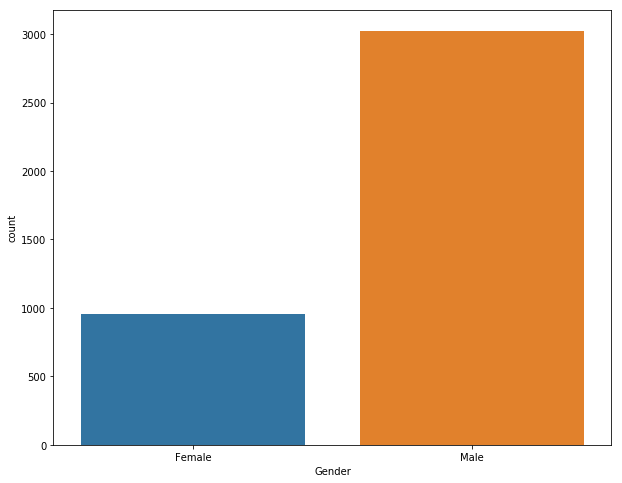

In [798]:
plt.figure(figsize=(10,8))
sns.countplot(x = df['Gender'],data = df)
plt.show()

## Count of students state-wise

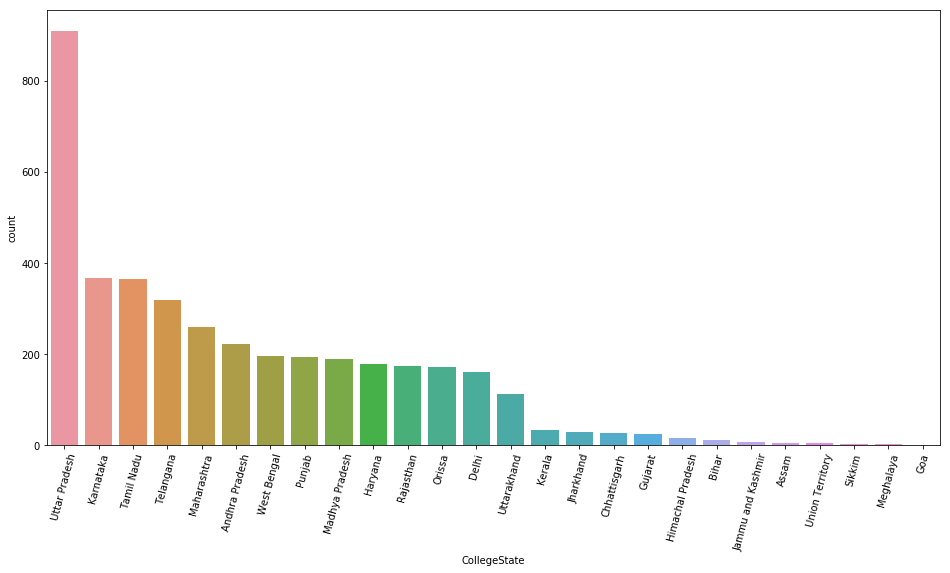

In [799]:
plt.figure(figsize=(16,8))
sns.countplot(x = df['CollegeState'],data = df,order = df['CollegeState'].value_counts().index)
plt.xticks(rotation = 75)
plt.show()

## Count of Students according to Specialization

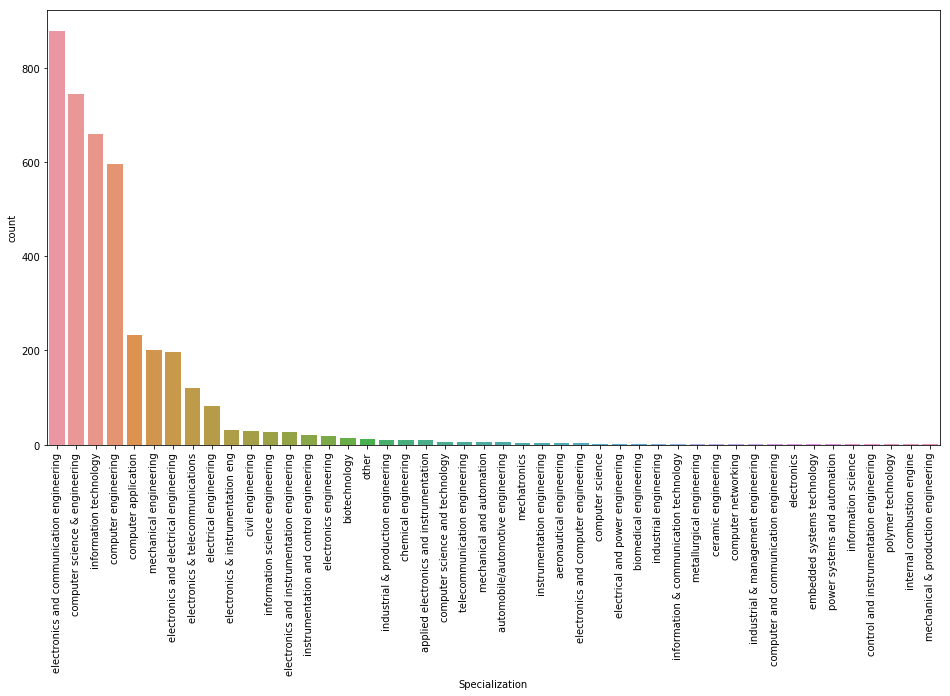

In [800]:
plt.figure(figsize=(16,8))
sns.countplot(x = df['Specialization'],data = df,order = df['Specialization'].value_counts().index,orient = 'V',)
plt.xticks(rotation = 90)
plt.show()

## Count of Students according to the Degree

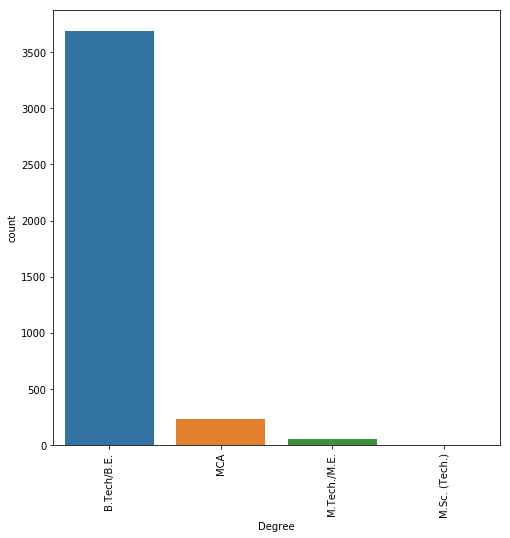

In [801]:
plt.figure(figsize=(8,8))
sns.countplot(x = df['Degree'],data = df,order = df['Degree'].value_counts().index,orient = 'V')
plt.xticks(rotation = 90)
plt.show()

## Count of Students according to Designation

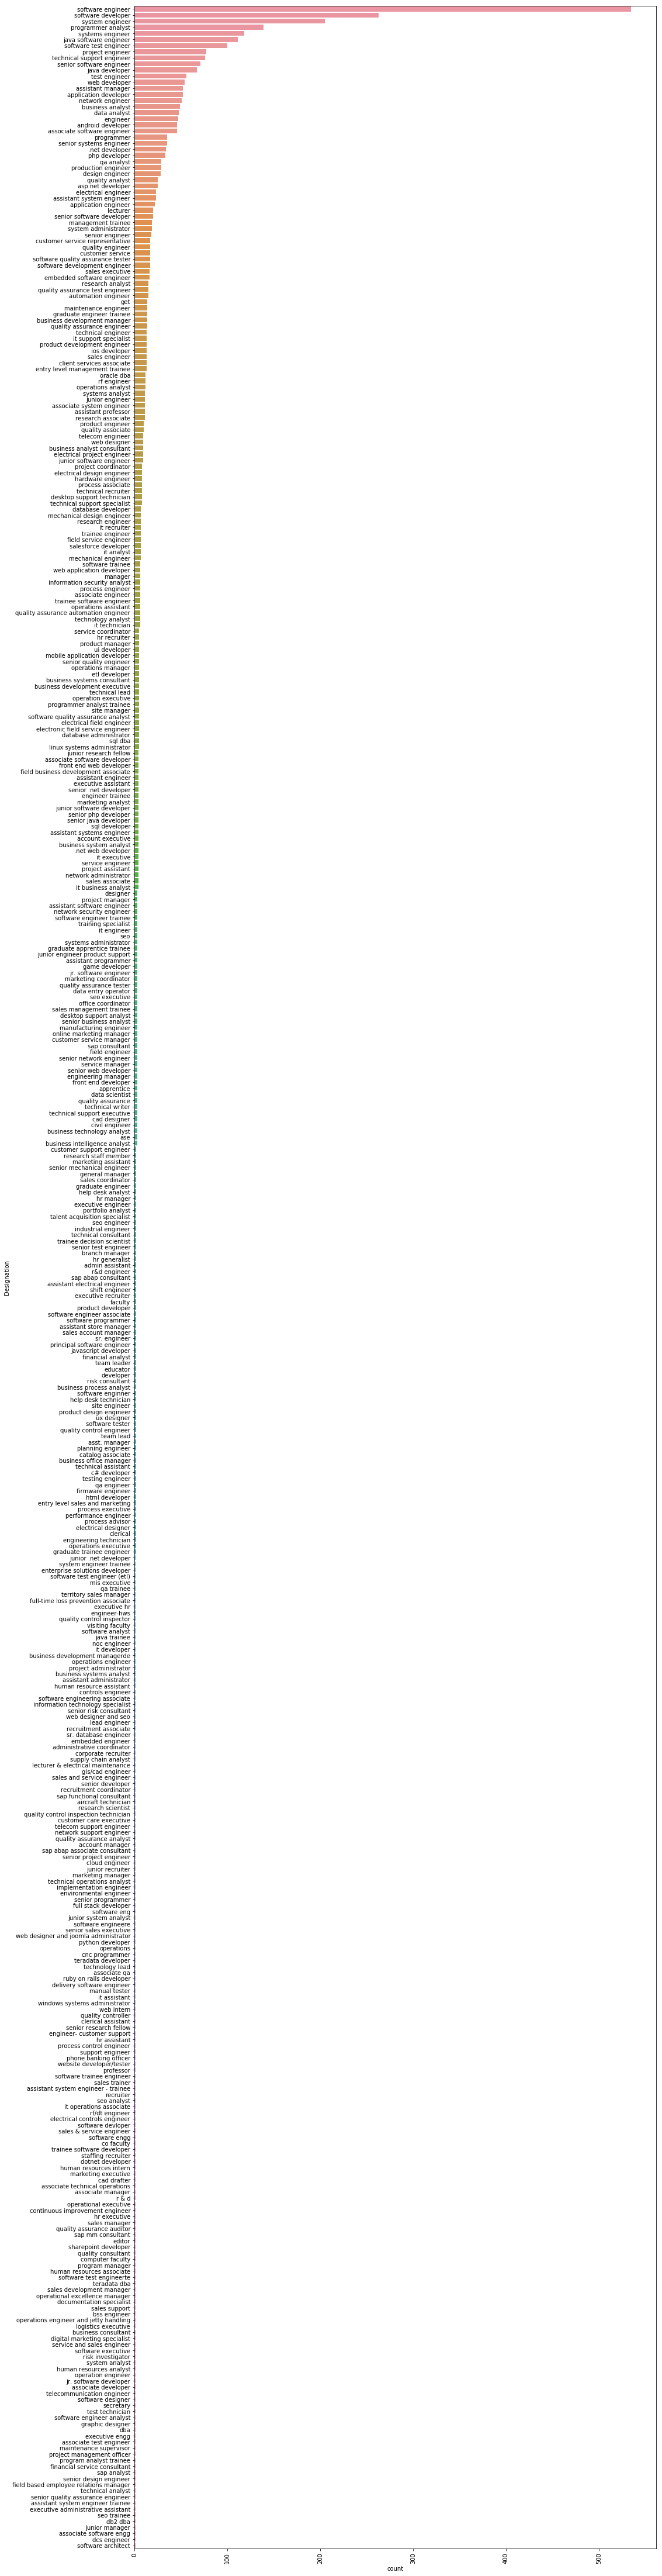

software engineer                         535
software developer                        263
system engineer                           205
programmer analyst                        139
systems engineer                          118
java software engineer                    111
software test engineer                    100
project engineer                           77
technical support engineer                 76
senior software engineer                   71
java developer                             67
test engineer                              56
web developer                              54
assistant manager                          52
application developer                      52
network engineer                           51
business analyst                           49
data analyst                               48
engineer                                   47
android developer                          46
associate software engineer                46
programmer                        

In [802]:
plt.figure(figsize=(16,80))
sns.countplot(y = df['Designation'],data = df,order = df['Designation'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()
df['Designation'].value_counts()

## Yearwise Student count

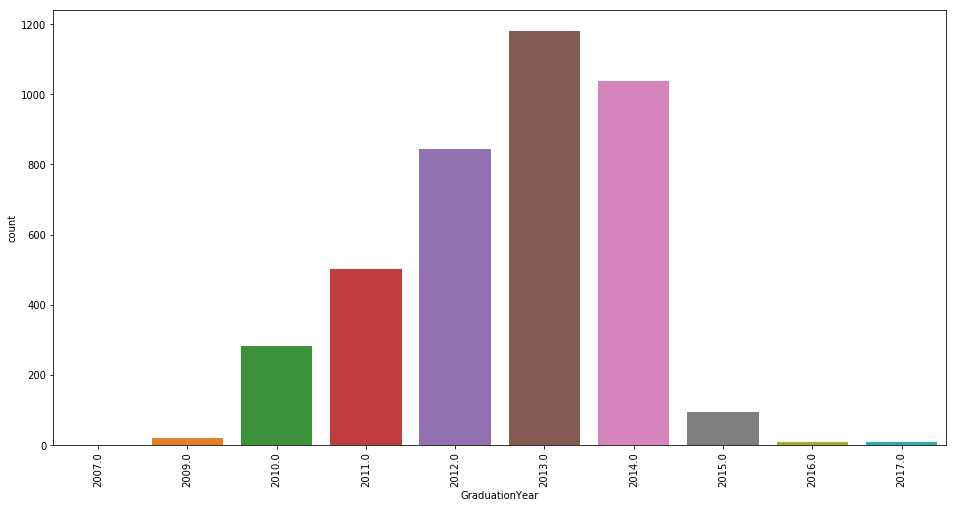

In [803]:
plt.figure(figsize=(16,8))
sns.countplot(x = df['GraduationYear'],data = df)
plt.xticks(rotation = 90)
plt.show()

## Pivoting Above graph

In [804]:
Graduation_count = pd.DataFrame(df.groupby('GraduationYear').count()['ID'])
Graduation_count

,ID
GraduationYear,
2007.0,1
2009.0,21
2010.0,282
2011.0,503
2012.0,845
2013.0,1181
2014.0,1037
2015.0,94
2016.0,7


## Count of City where students have worked.

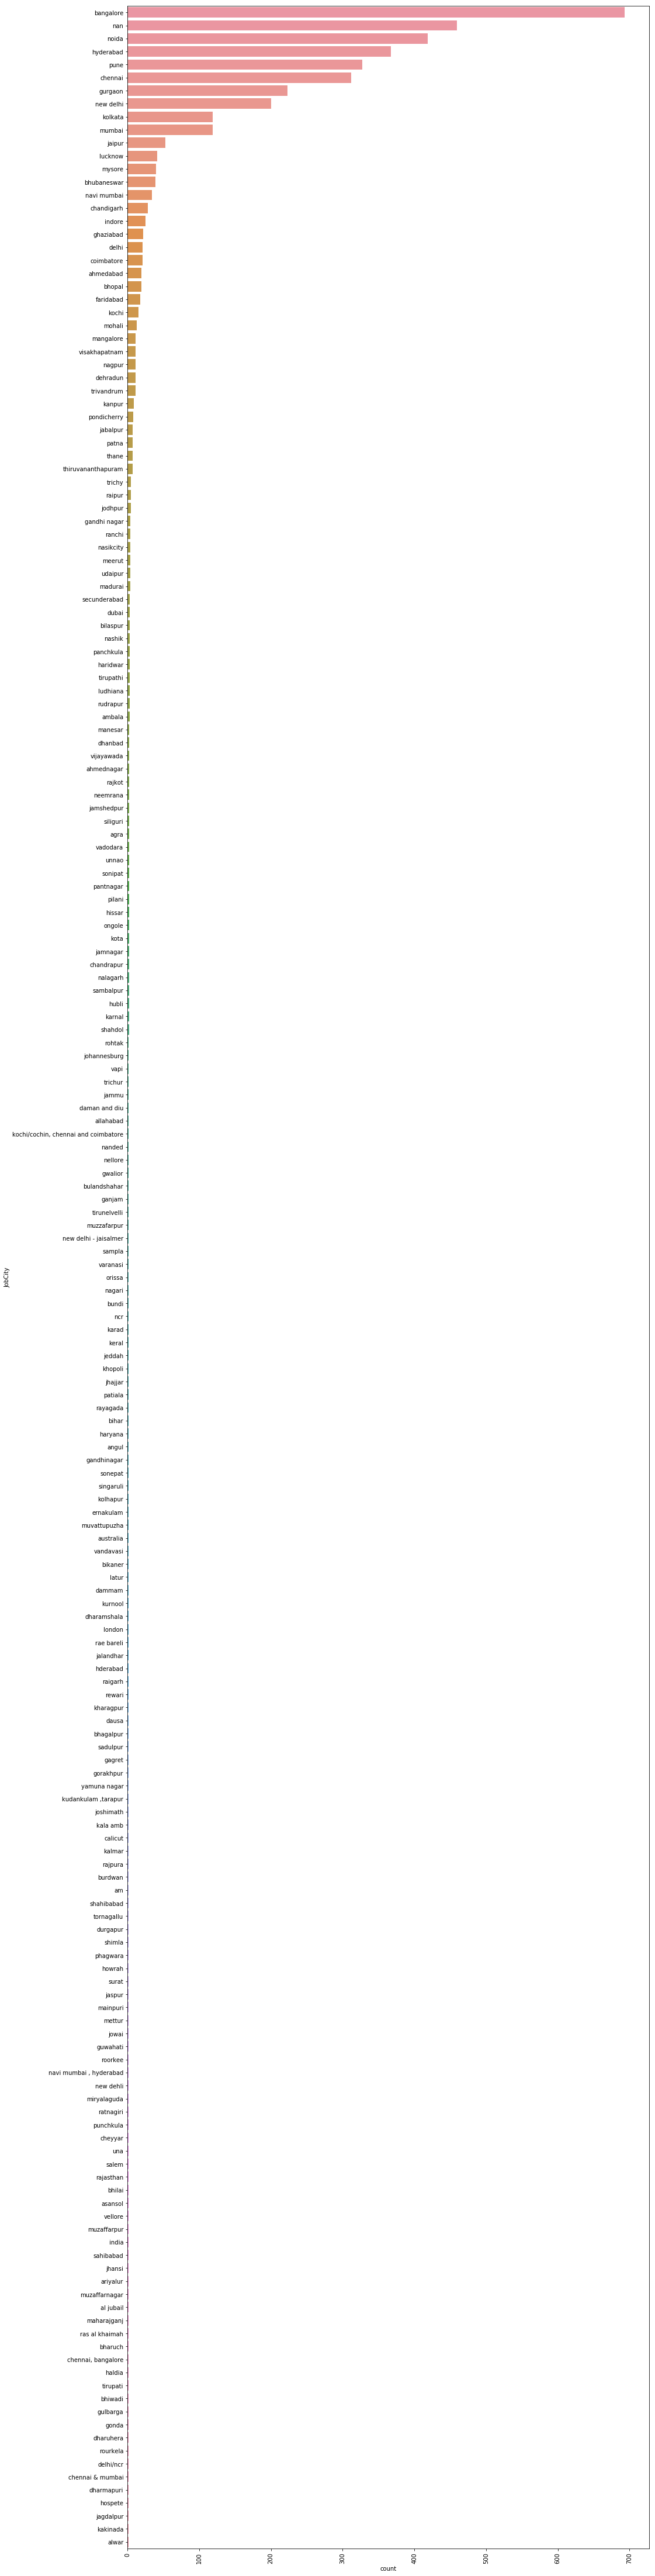

In [805]:
plt.figure(figsize=(16,80))
sns.countplot(y = df['JobCity'],data = df,order = df['JobCity'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

## Pivoting Above graph

In [806]:
df.groupby('JobCity').count()['ID'].unique

<bound method Series.unique of JobCity
agra                    2
ahmedabad              19
ahmednagar              2
al jubail               1
allahabad               1
alwar                   1
am                      1
ambala                  3
angul                   1
ariyalur                1
asansol                 1
australia               1
bangalore             693
bhagalpur               1
bharuch                 1
bhilai                  1
bhiwadi                 1
bhopal                 19
bhubaneswar            39
bihar                   1
bikaner                 1
bilaspur                3
bulandshahar            1
bundi                   1
burdwan                 1
calicut                 1
chandigarh             28
chandrapur              2
chennai               312
chennai & mumbai        1
                     ... 
sampla                  1
secunderabad            3
shahdol                 2
shahibabad              1
shimla                  1
siliguri                2

### Exploratory Data Analysis

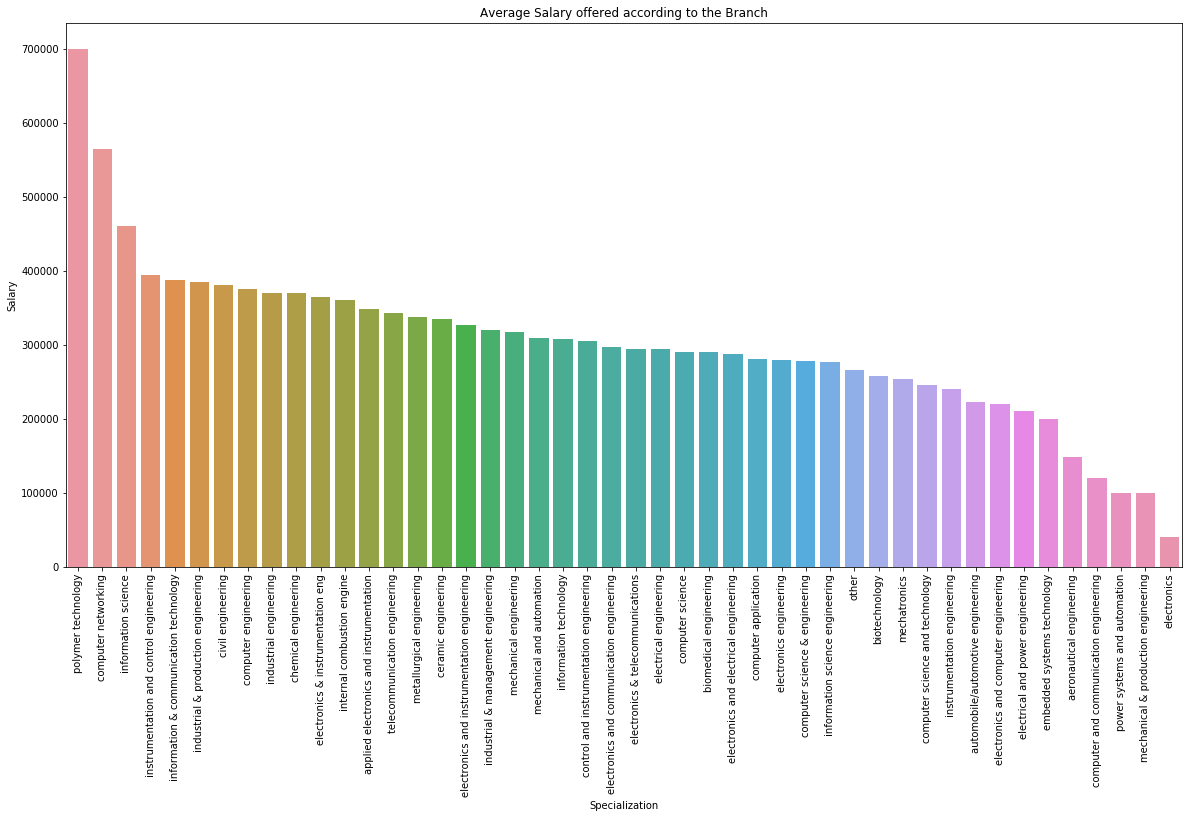

In [807]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Specialization',y = 'Salary', data = df[['Specialization','Salary']].groupby('Specialization',as_index= False).mean().sort_values('Salary',ascending=False))
plt.xticks(rotation = 90)
plt.title('Average Salary offered according to the Branch');

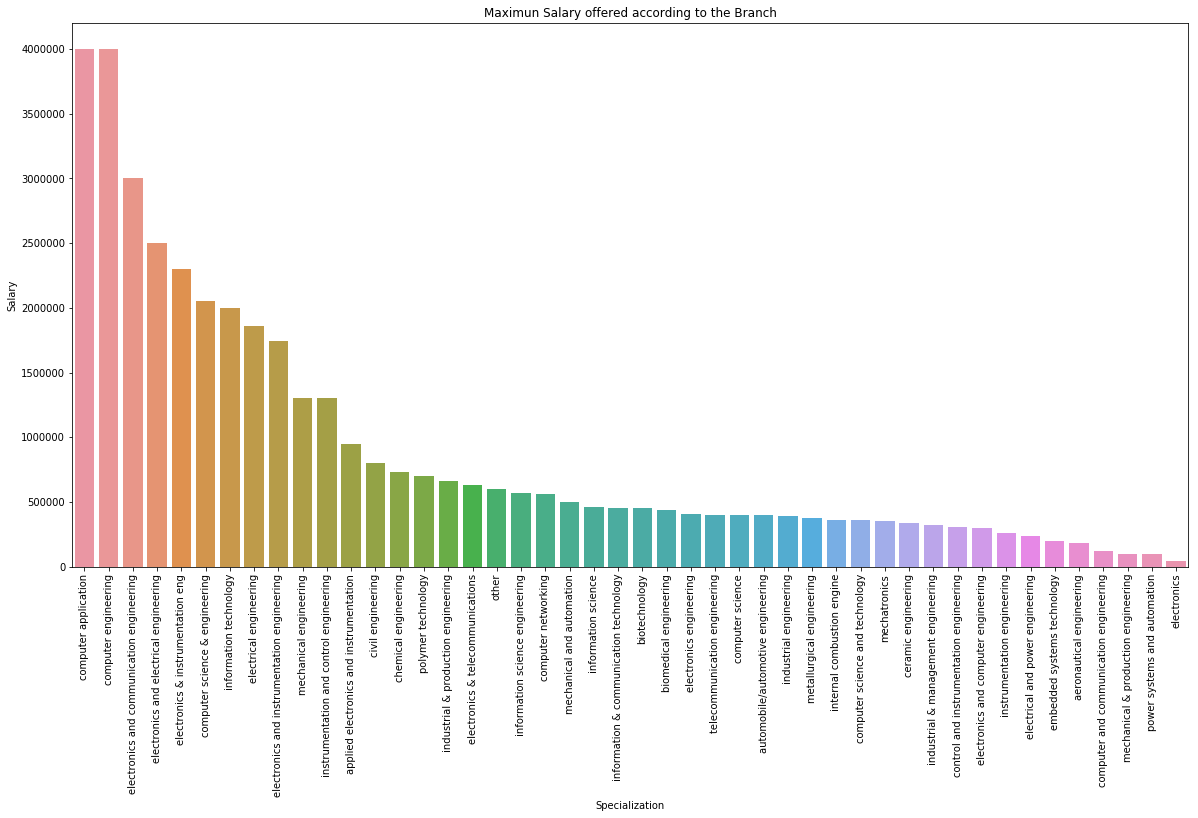

In [808]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Specialization',y = 'Salary', data = df[['Specialization','Salary']].groupby('Specialization',as_index= False).max().sort_values('Salary',ascending=False))
plt.xticks(rotation = 90)
plt.title('Maximun Salary offered according to the Branch');

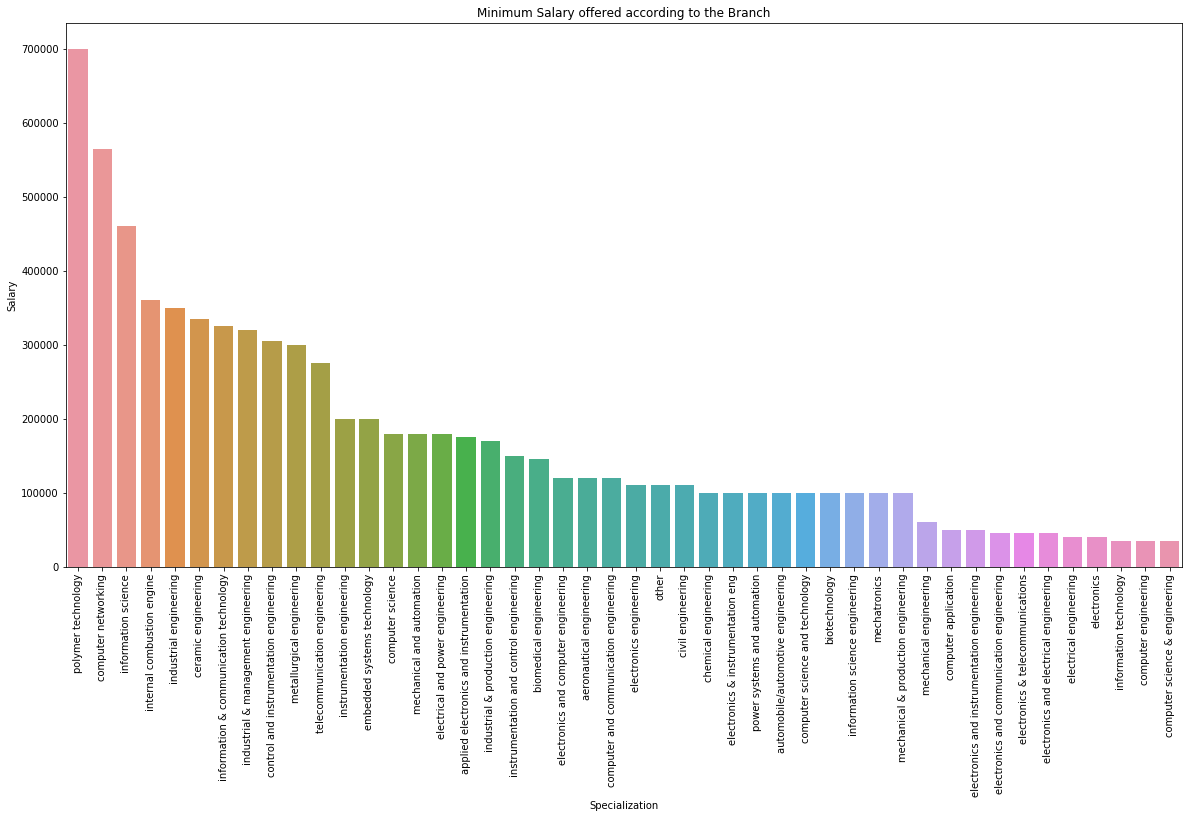

In [809]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Specialization',y = 'Salary', data = df[['Specialization','Salary']].groupby('Specialization',as_index= False).min().sort_values('Salary',ascending=False))
plt.xticks(rotation = 90)
plt.title('Minimum Salary offered according to the Branch');

### Gender v/s Salary 

1.   **Number of male candidate is more than female candidate**
2.   **Average salary offered to male and female candidate is almost same**
3.  **Maximum salary offered to male candidate is more than that of female candidate**
4.  **Minimum salary that is offered to male candidate is same that of female candidate**

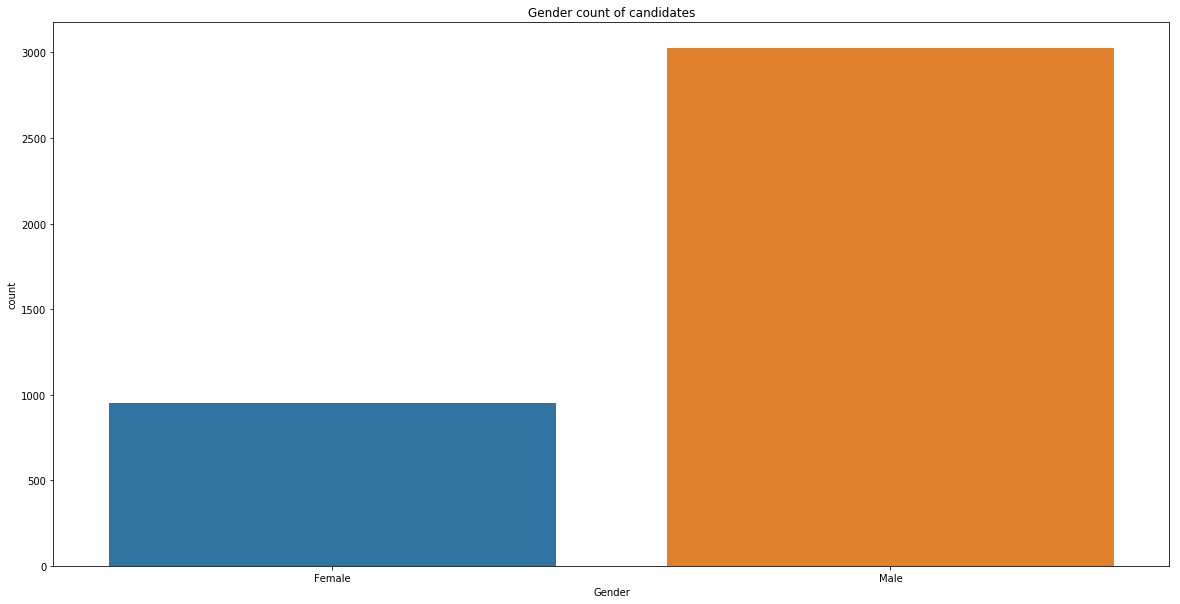

In [810]:
fig = plt.figure(figsize=(20,10))
sns.countplot(df['Gender'],)
plt.title('Gender count of candidates');

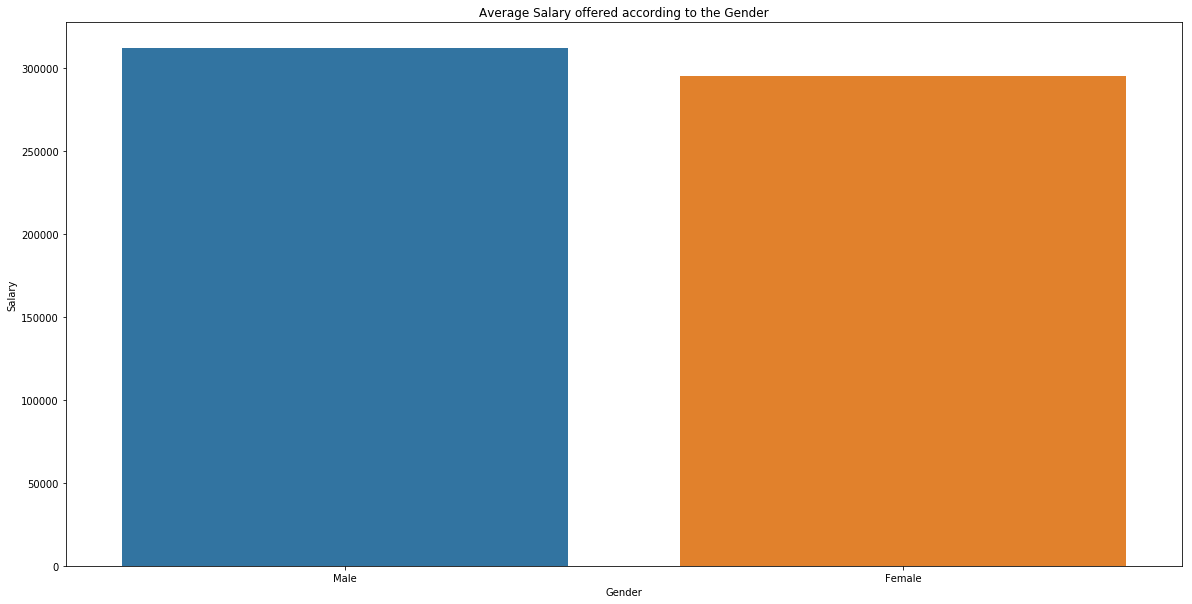

In [811]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y = 'Salary', data = df[['Gender','Salary']].groupby('Gender',as_index= False).mean().sort_values('Salary',ascending=False))
plt.title('Average Salary offered according to the Gender');

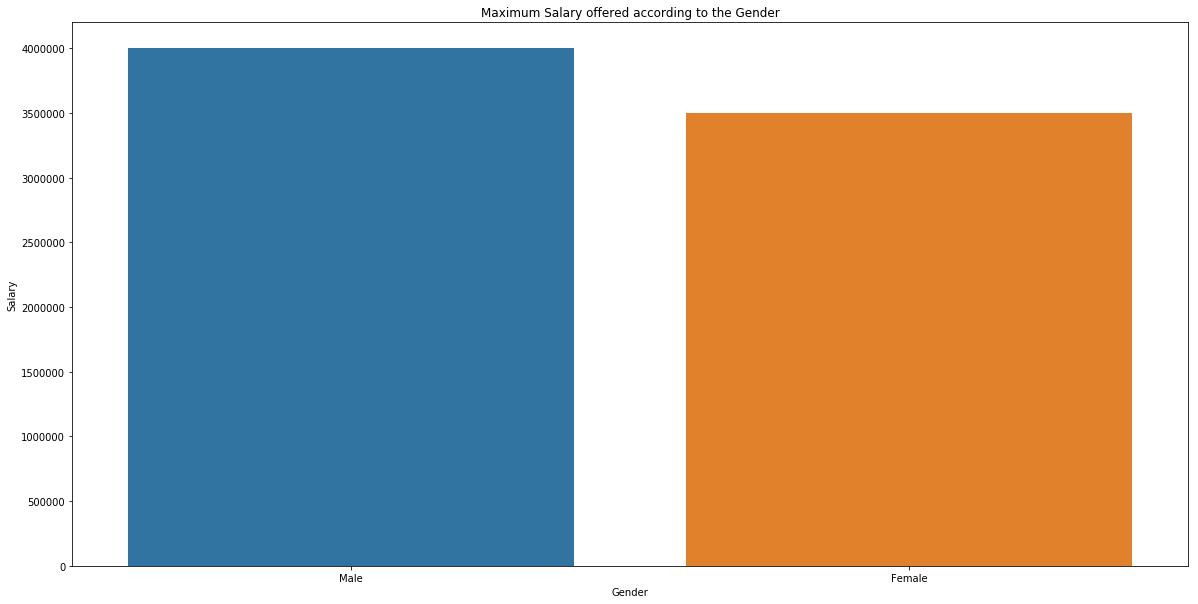

In [812]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y = 'Salary', data = df[['Gender','Salary']].groupby('Gender',as_index= False).max().sort_values('Salary',ascending=False))
plt.title('Maximum Salary offered according to the Gender');

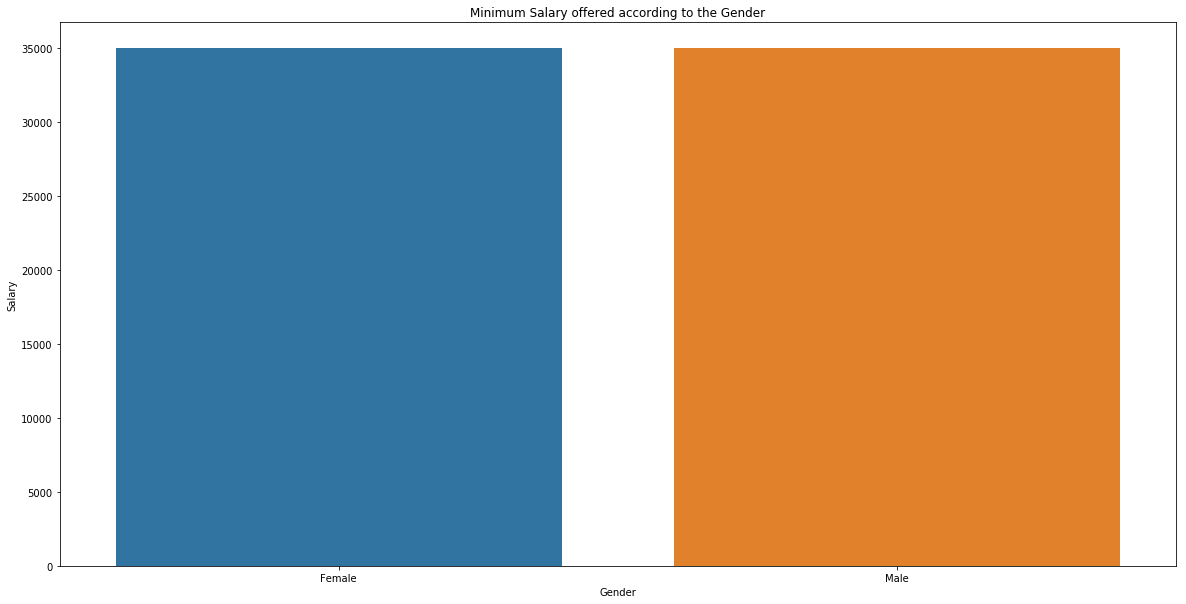

In [813]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y = 'Salary', data = df[['Gender','Salary']].groupby('Gender',as_index= False).min().sort_values('Salary',ascending=False))
plt.title('Minimum Salary offered according to the Gender');

### College Status v/s Salary

1.   **There is large difference between average and minimum salary offered in two tier**
2.   **But there is no difference between Maximum salary offered in both type of college**

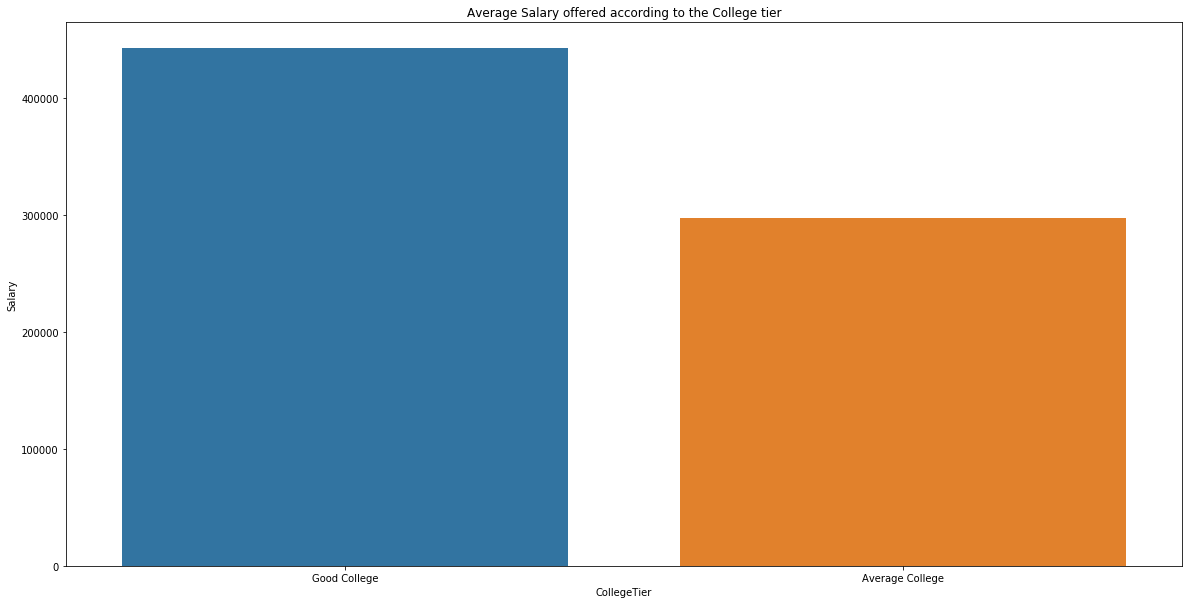

In [814]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='CollegeTier',y = 'Salary', data = df[['CollegeTier','Salary']].groupby('CollegeTier',as_index= False).mean().sort_values('Salary',ascending=False))
plt.title('Average Salary offered according to the College tier');

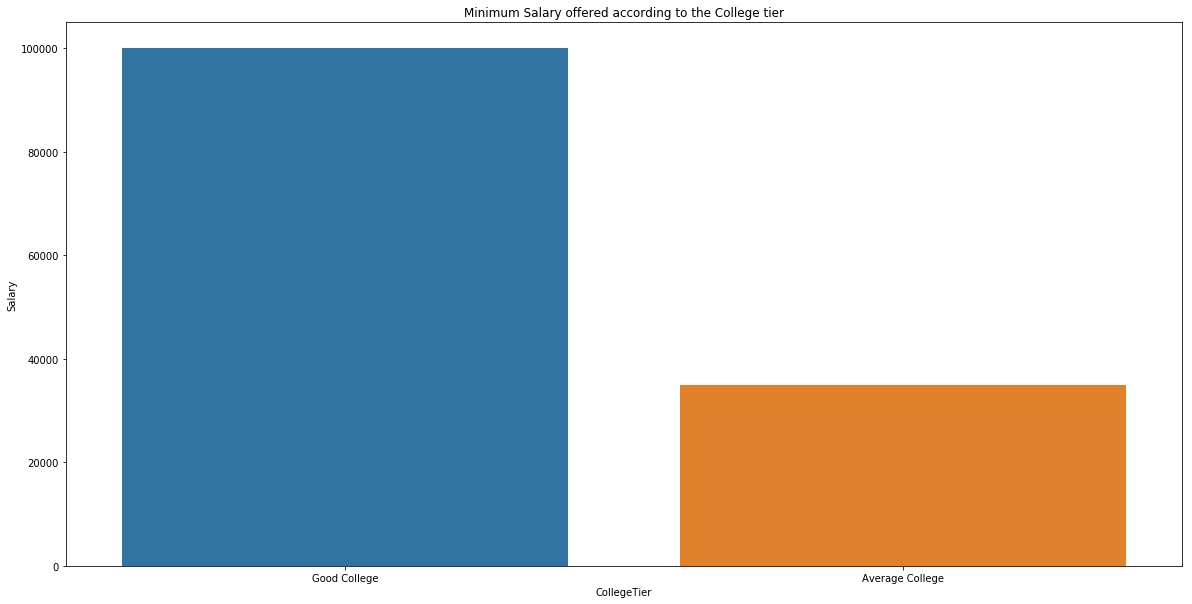

In [815]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='CollegeTier',y = 'Salary', data = df[['CollegeTier','Salary']].groupby('CollegeTier',as_index= False).min().sort_values('Salary',ascending=False))
plt.title('Minimum Salary offered according to the College tier');

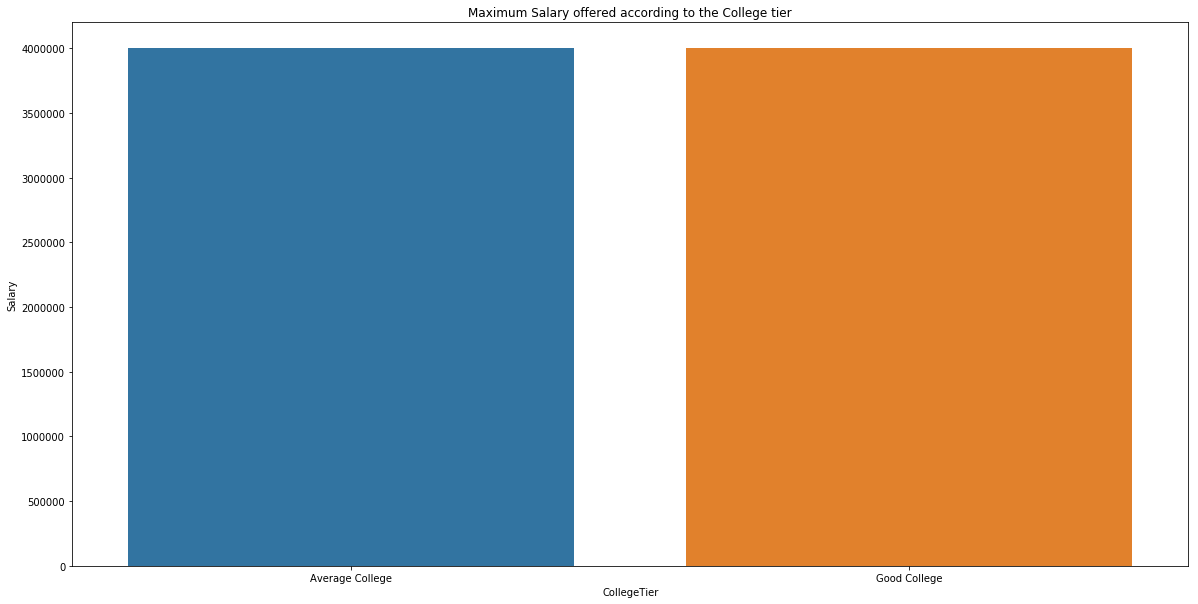

In [816]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='CollegeTier',y = 'Salary', data = df[['CollegeTier','Salary']].groupby('CollegeTier',as_index= False).max().sort_values('Salary',ascending=False))
plt.title('Maximum Salary offered according to the College tier');

### Degree v/s Salary

1.   **Average salary that is offered to a candidate with  M.Tech or M.E. degree  is the highest**
2.   **Average salary that is offered to a candidate with  MCA degree  is the lowest**
3. **But Maximum salary that is offered to a candidate with  B.Tech or B.E. degree  is the highest**
4. **Also minimum salary that is offered to a candidate with  B.Tech or B.E. degree  is the lowest**

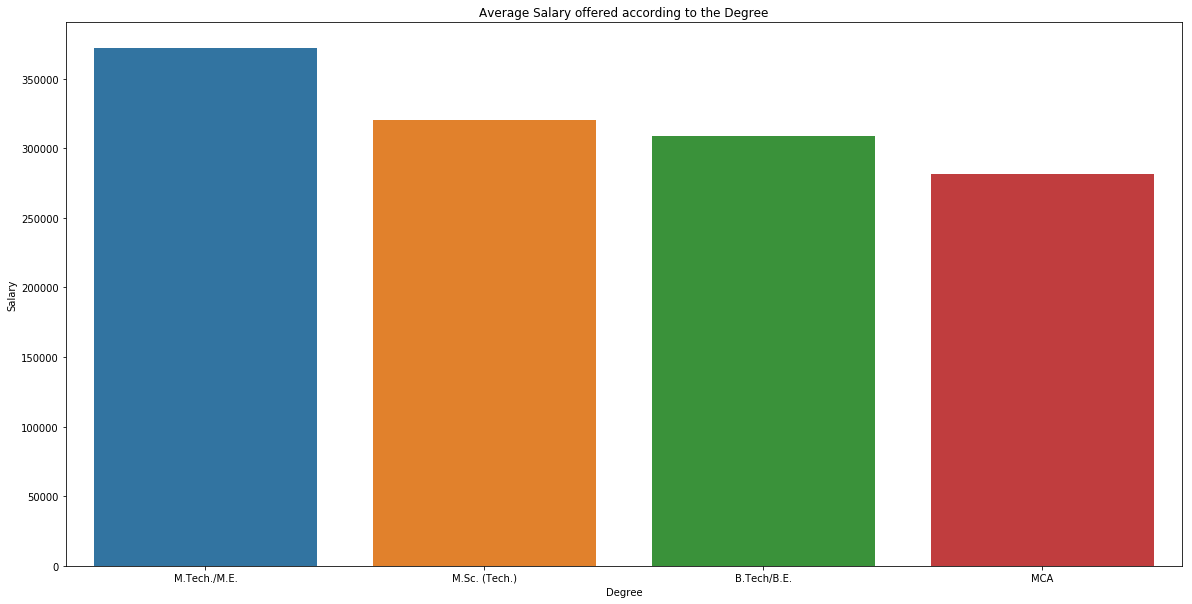

In [817]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Degree',y = 'Salary', data = df[['Degree','Salary']].groupby('Degree',as_index= False).mean().sort_values('Salary',ascending=False))
plt.title('Average Salary offered according to the Degree');

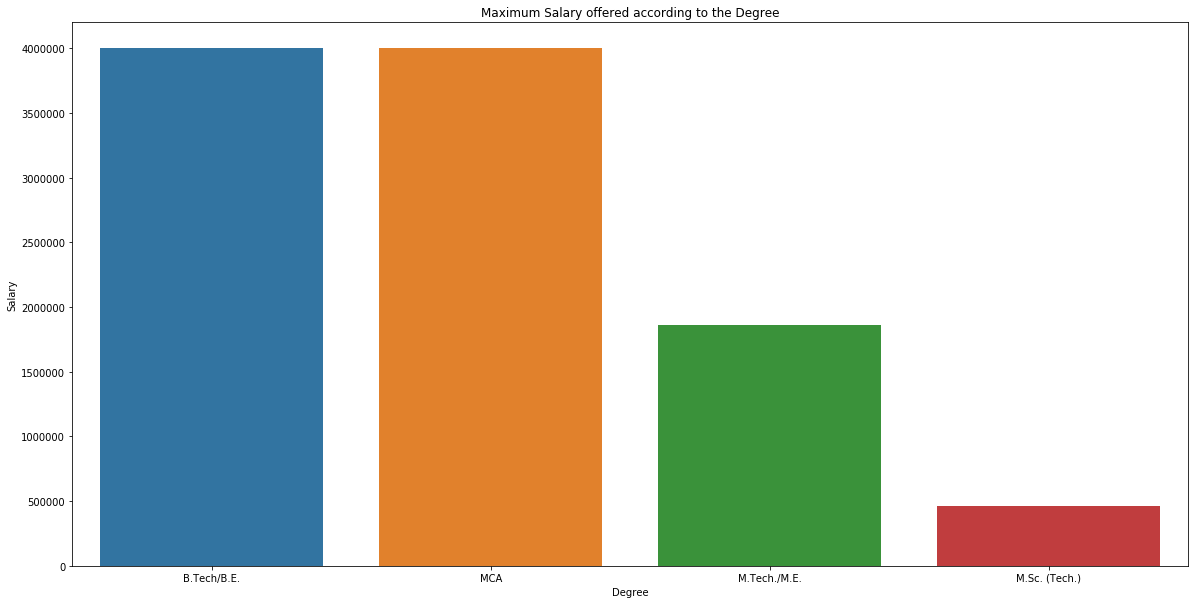

In [818]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Degree',y = 'Salary', data = df[['Degree','Salary']].groupby('Degree',as_index = False).max().sort_values('Salary',ascending=False))
plt.title('Maximum Salary offered according to the Degree');

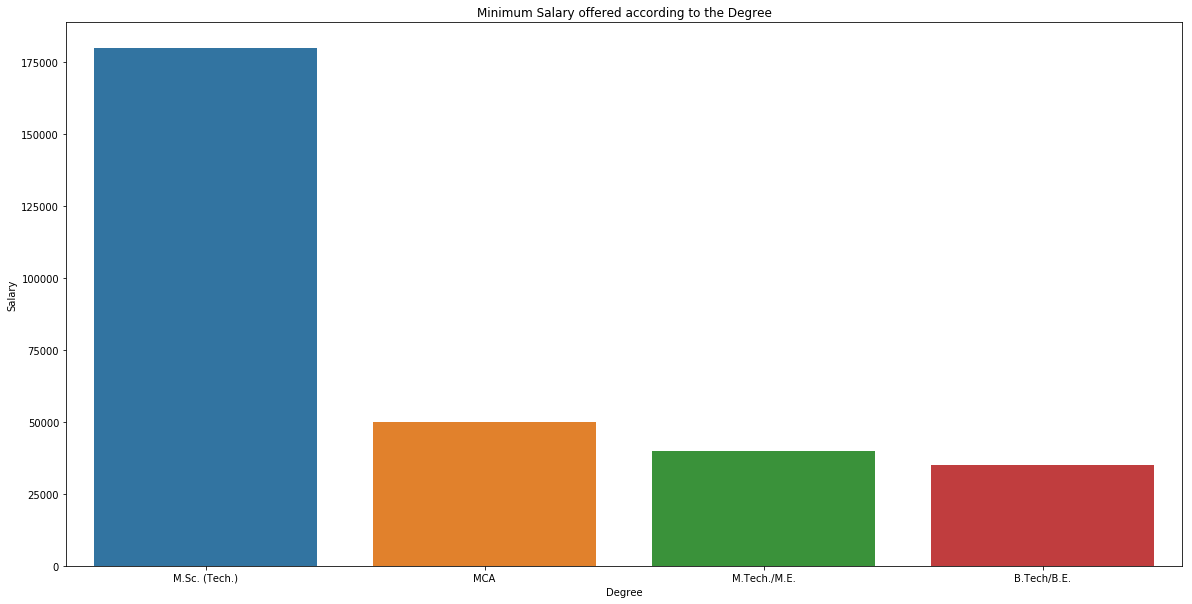

In [819]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Degree',y = 'Salary', data = df[['Degree','Salary']].groupby('Degree',as_index= False).min().sort_values('Salary',ascending=False))
plt.title('Minimum Salary offered according to the Degree');

### Designtion v/s Salary

### Best option for career advancement

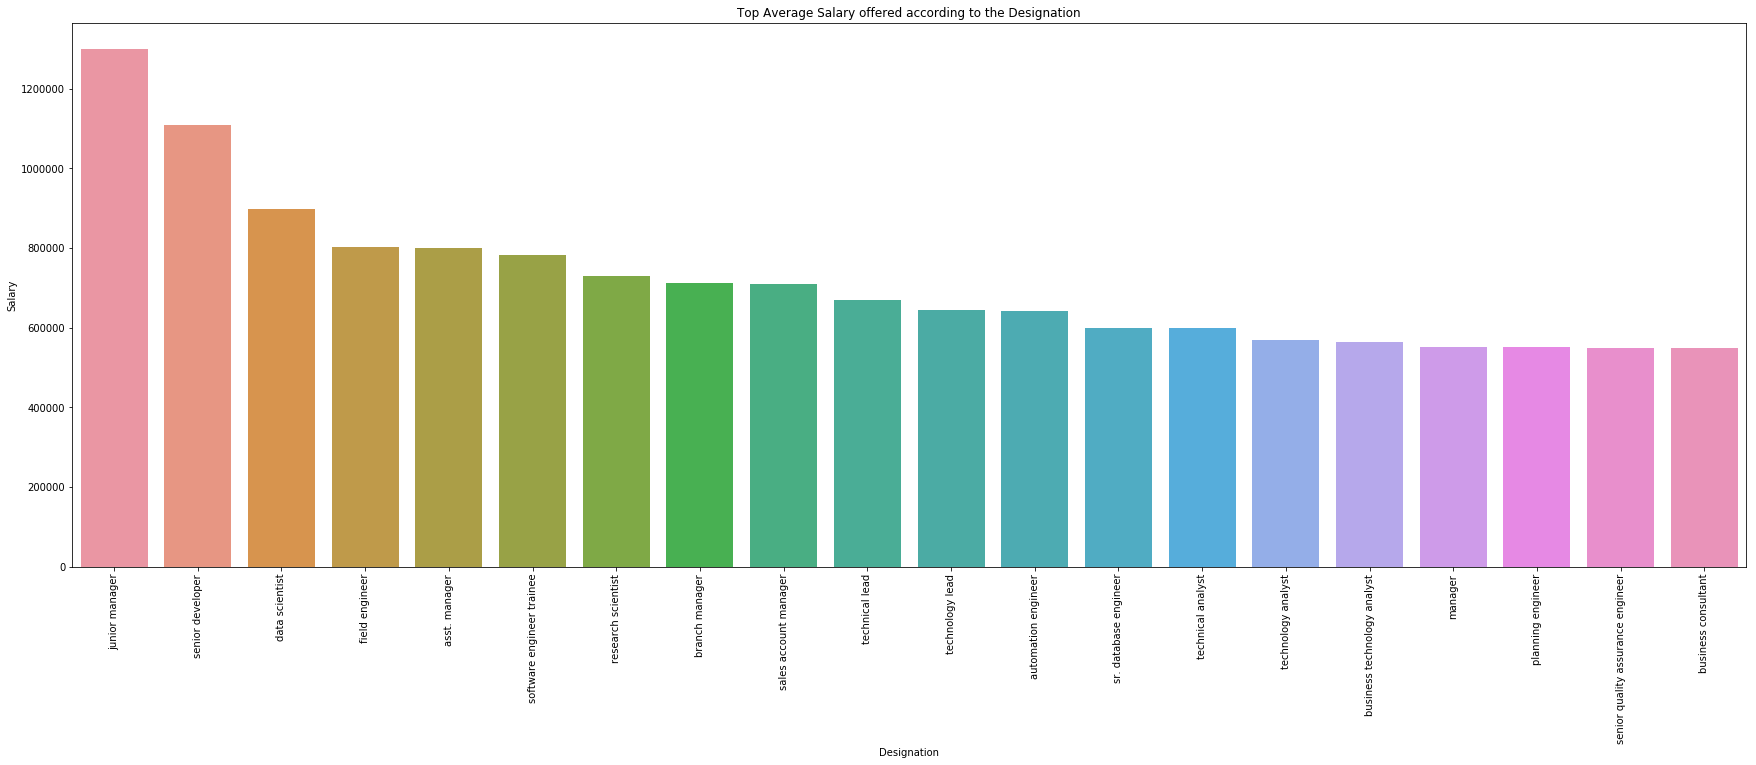

In [820]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='Designation',y = 'Salary', data = df[['Designation','Salary']].groupby('Designation',as_index= False).mean().sort_values('Salary',ascending=False)[:20])
plt.title('Top Average Salary offered according to the Designation')
plt.xticks(rotation = 90);

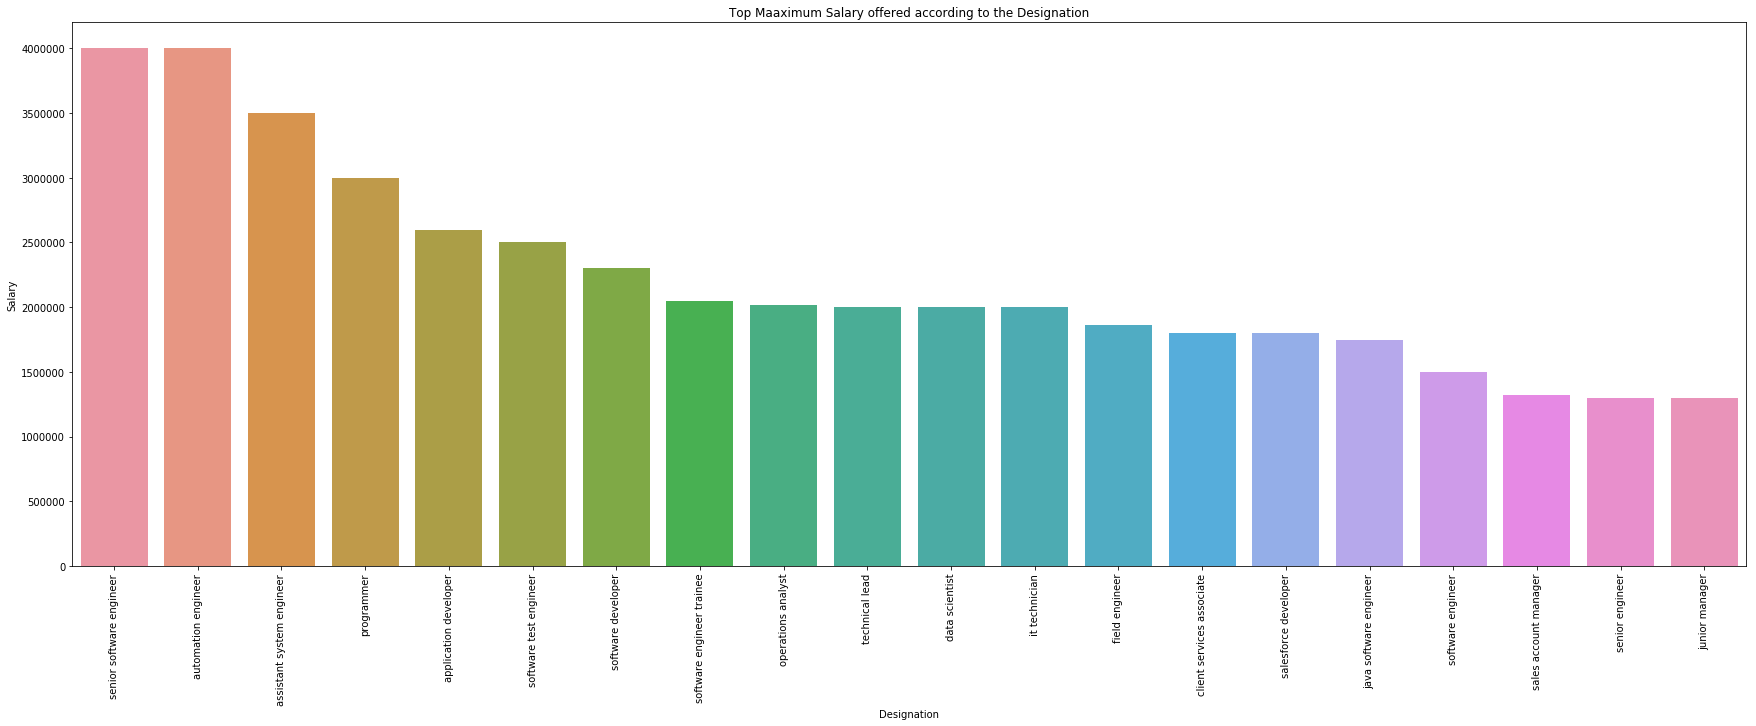

In [821]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='Designation',y = 'Salary', data = df[['Designation','Salary']].groupby('Designation',as_index= False).max().sort_values('Salary',ascending=False)[:20])
plt.title('Top Maaximum Salary offered according to the Designation')
plt.xticks(rotation = 90);

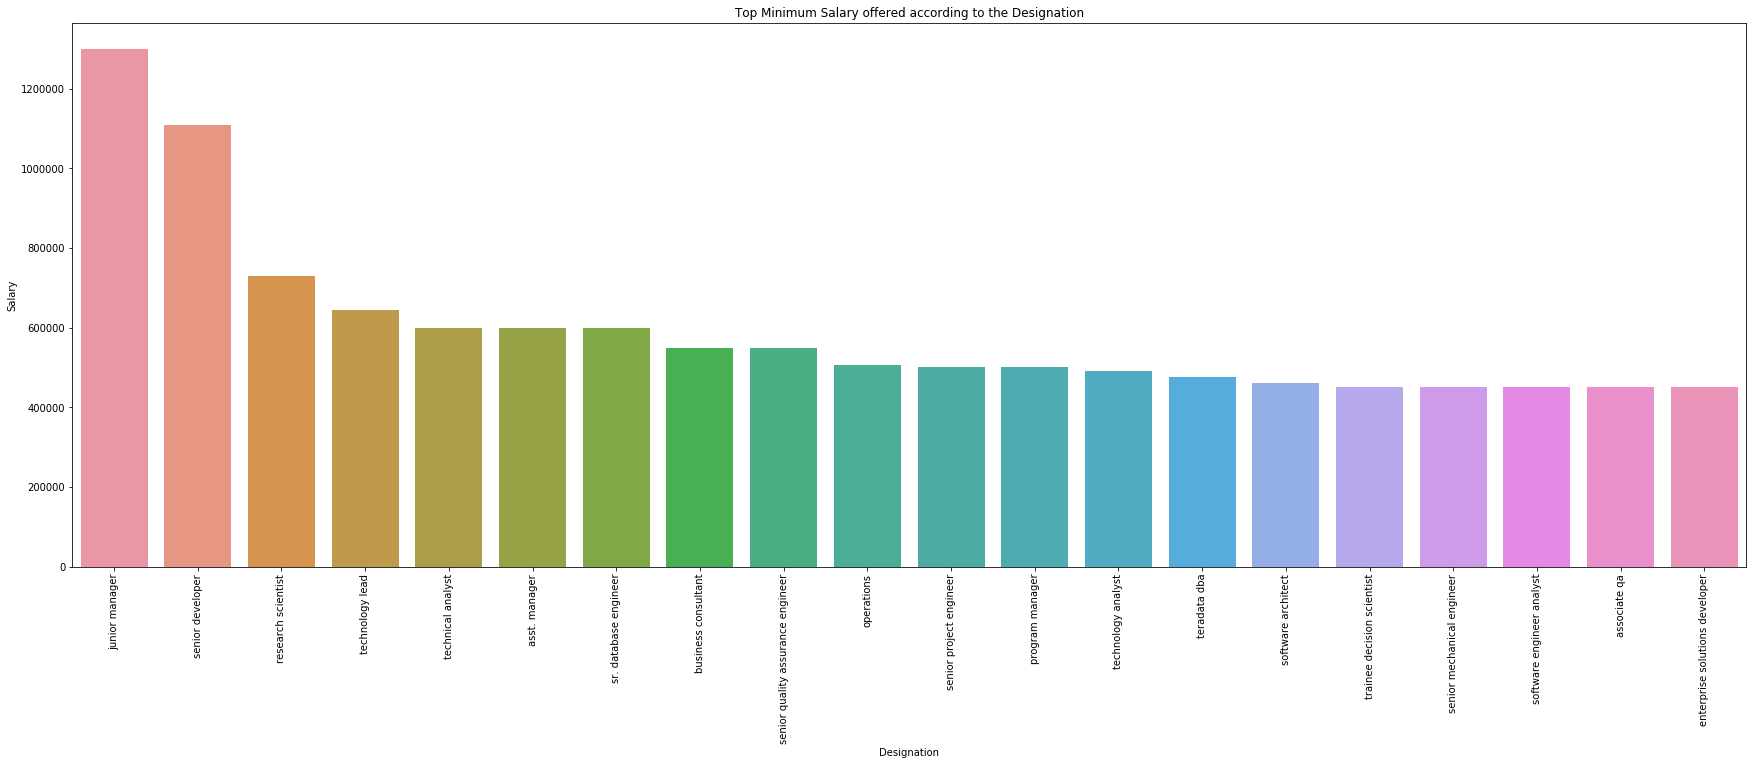

In [822]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='Designation',y = 'Salary', data = df[['Designation','Salary']].groupby('Designation',as_index= False).min().sort_values('Salary',ascending=False)[:20])
plt.title('Top Minimum Salary offered according to the Designation')
plt.xticks(rotation = 90);

### Worst option for career adavement

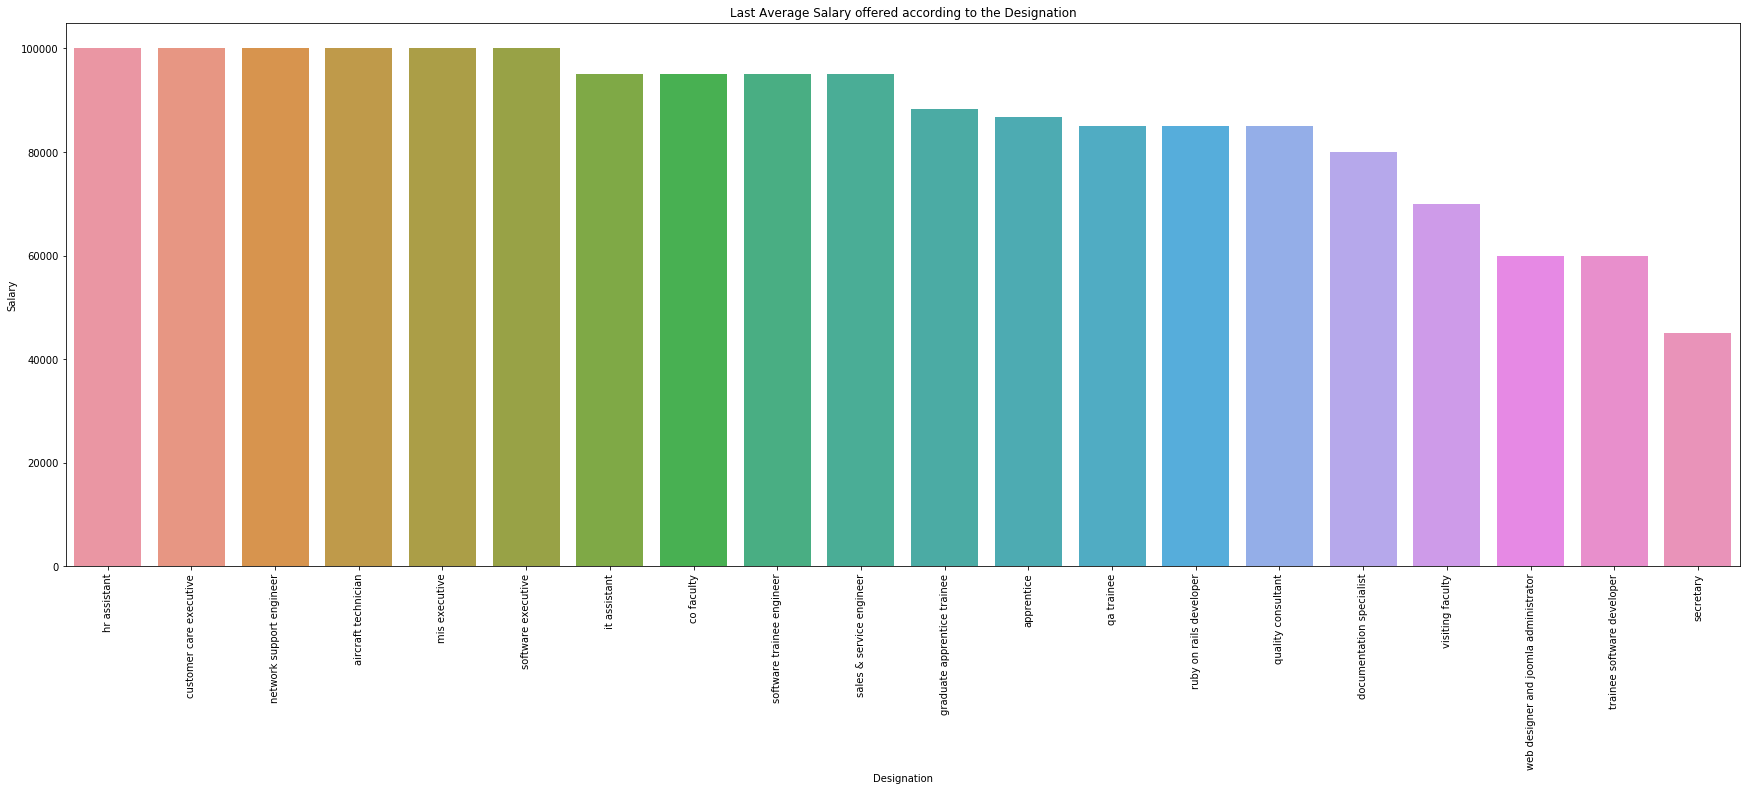

In [823]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='Designation',y = 'Salary', data = df[['Designation','Salary']].groupby('Designation',as_index= False).mean().sort_values('Salary',ascending=False)[-20:])
plt.title('Last Average Salary offered according to the Designation')
plt.xticks(rotation = 90);

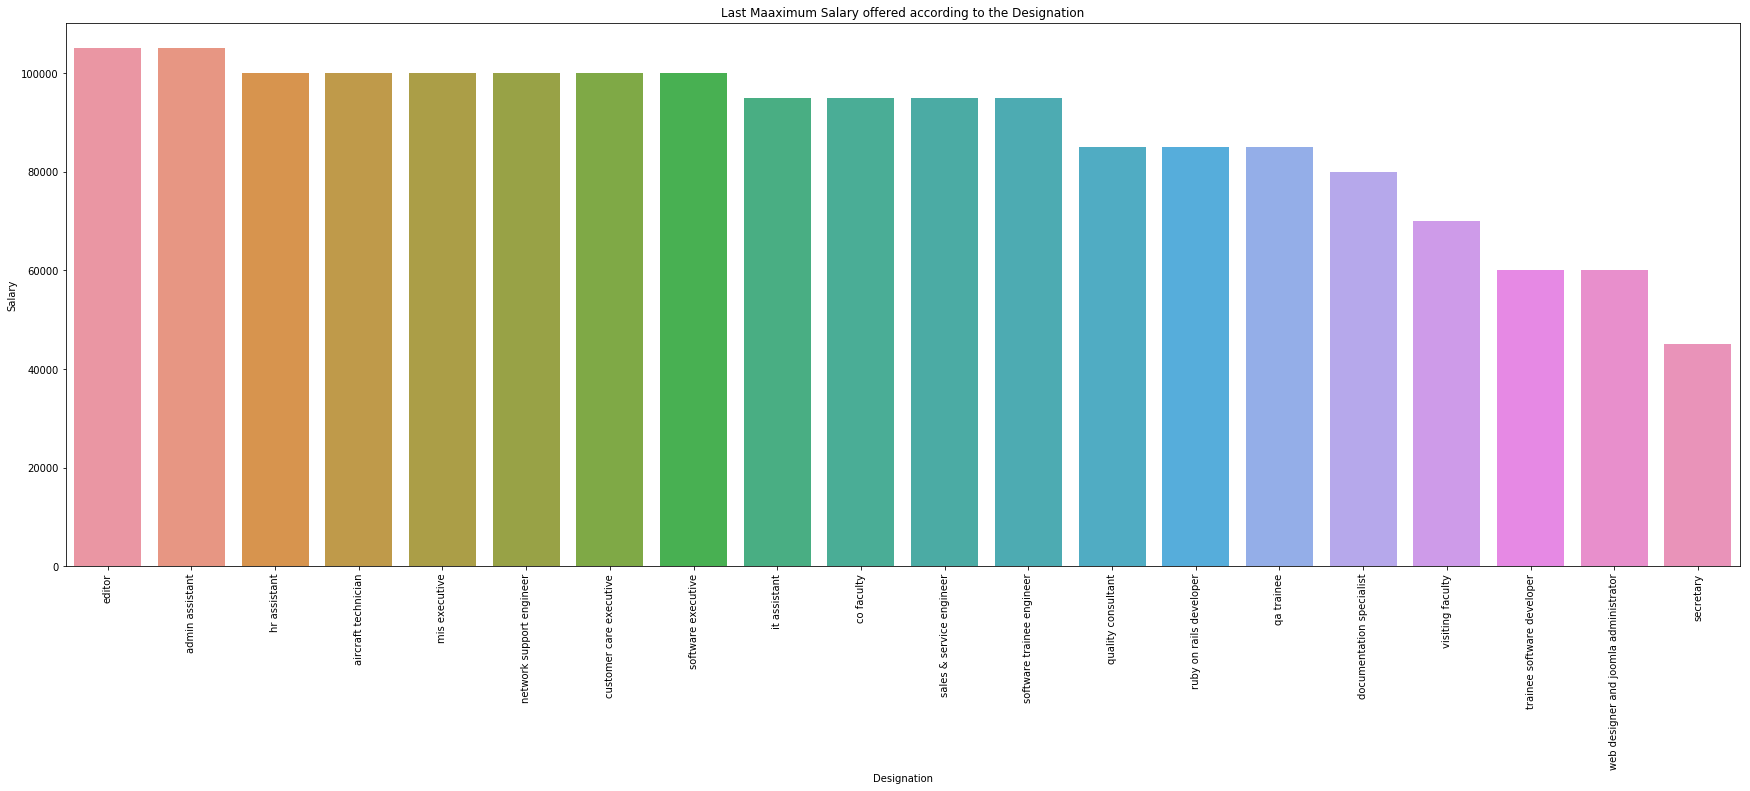

In [824]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='Designation',y = 'Salary', data = df[['Designation','Salary']].groupby('Designation',as_index= False).max().sort_values('Salary',ascending=False)[-20:])
plt.title('Last Maaximum Salary offered according to the Designation')
plt.xticks(rotation = 90);

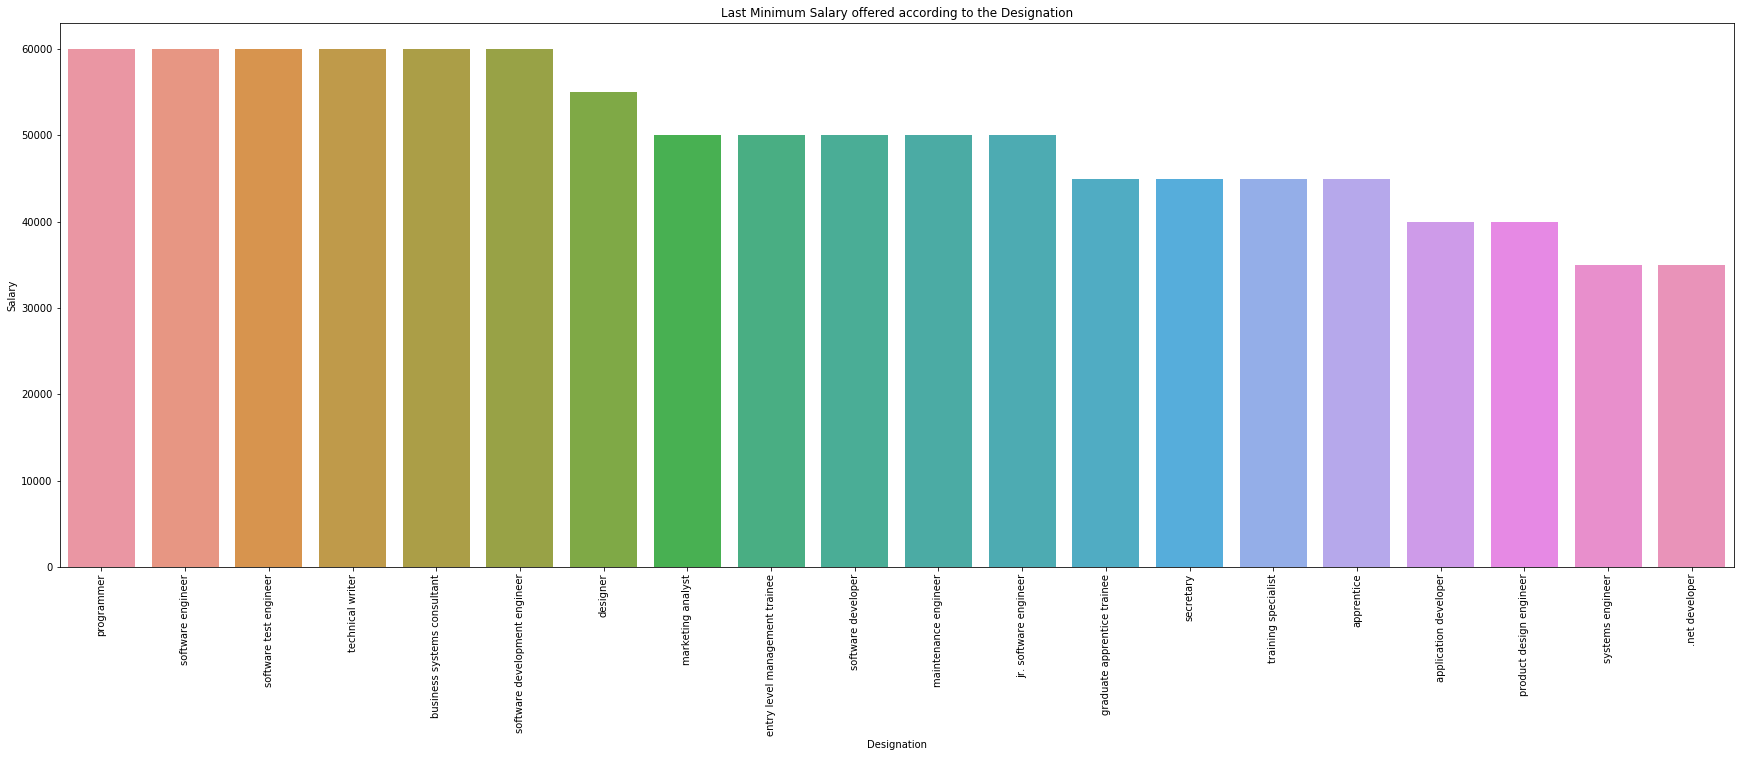

In [825]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='Designation',y = 'Salary', data = df[['Designation','Salary']].groupby('Designation',as_index= False).min().sort_values('Salary',ascending=False)[-20:])
plt.title('Last Minimum Salary offered according to the Designation')
plt.xticks(rotation = 90);

### Year v/s Salary

1.   **2010 was the year which offer highest average salary to the candidate**
2.   **2007 was the worst year which offer lowest average salary to the candidate**
3.   **2011 and 2014 was the year in which the candidates are offered the lowest minimum salary**
4.   **2010 is the year in which the candidates are offered the highest maximum salary**

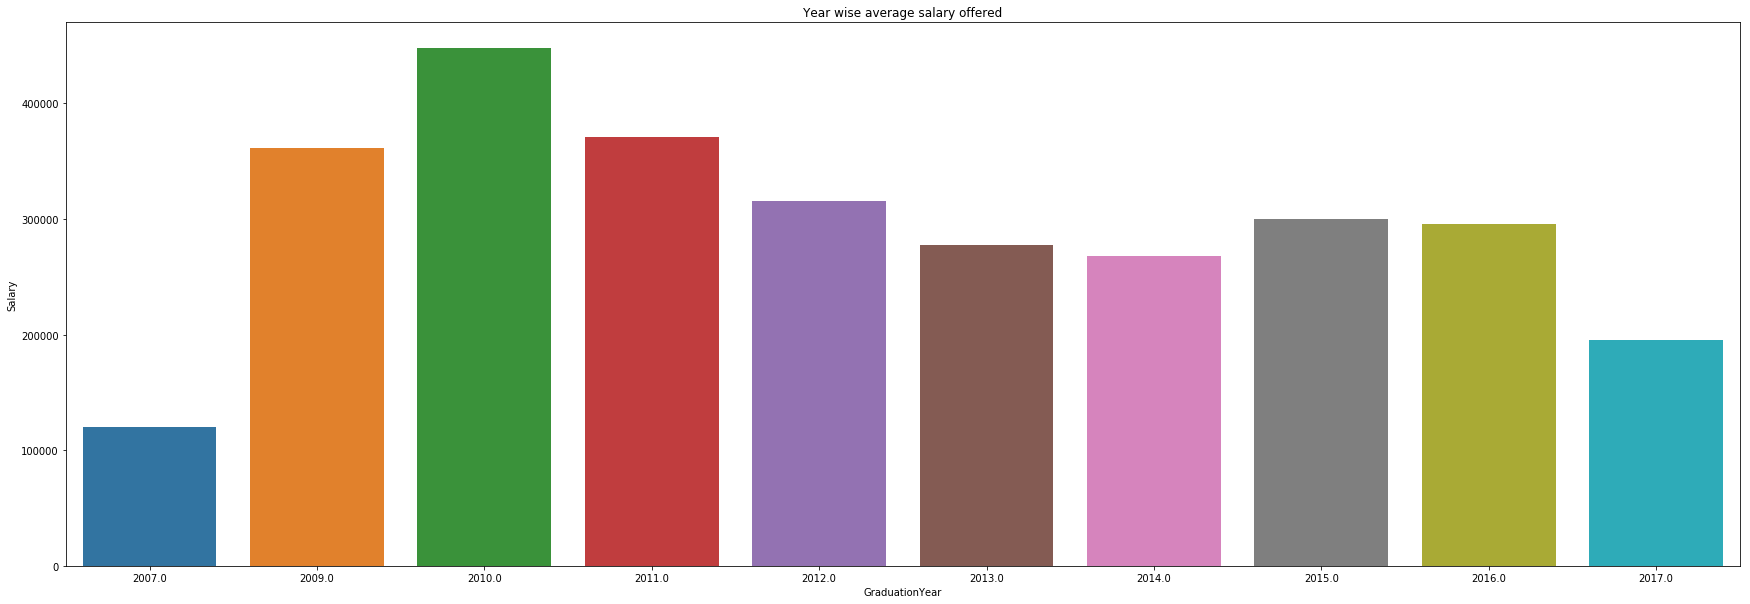

In [826]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='GraduationYear',y='Salary',data=df[['Salary','GraduationYear']].groupby(['GraduationYear'],as_index =False).mean().sort_values('Salary',ascending=False))
plt.title('Year wise average salary offered');

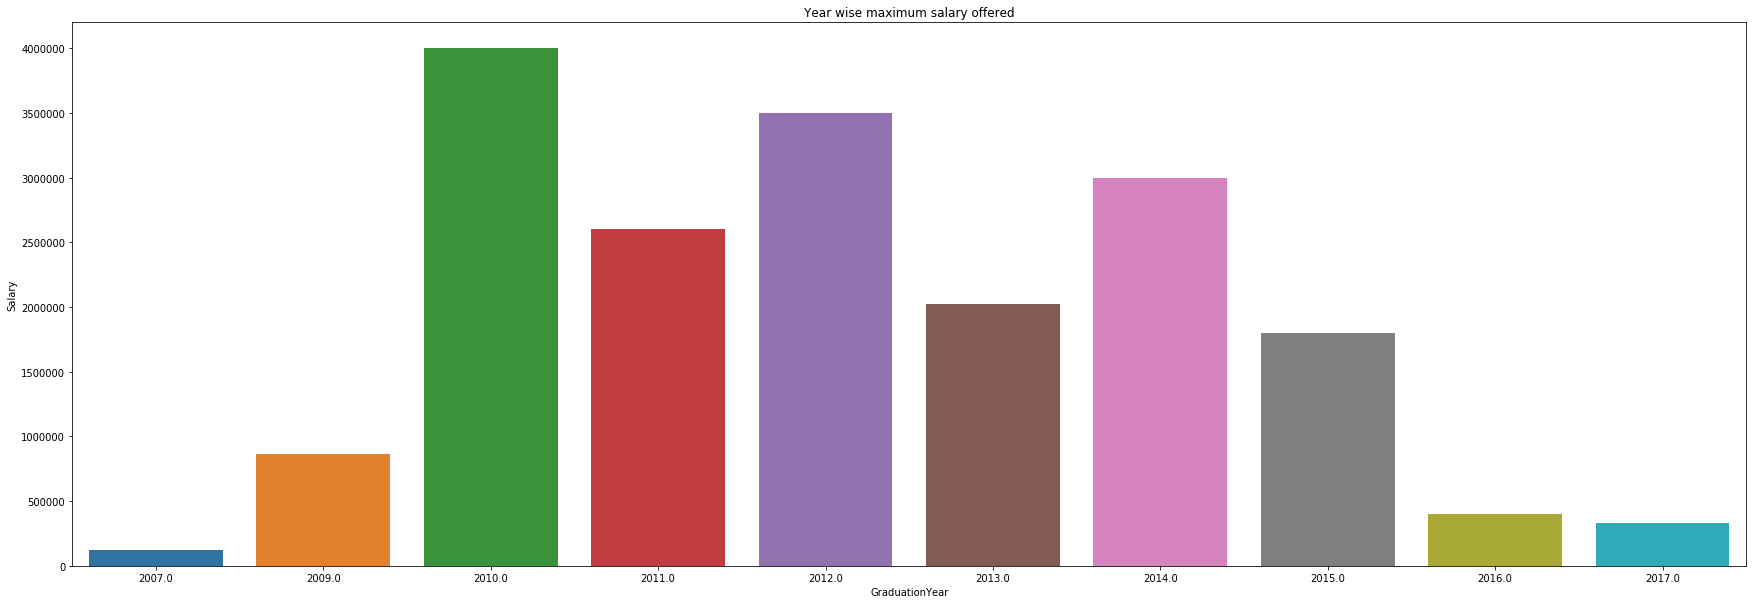

In [827]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='GraduationYear',y='Salary',data=df[['Salary','GraduationYear']].groupby(['GraduationYear'],as_index =False).max().sort_values('Salary',ascending=False))
plt.title('Year wise maximum salary offered');

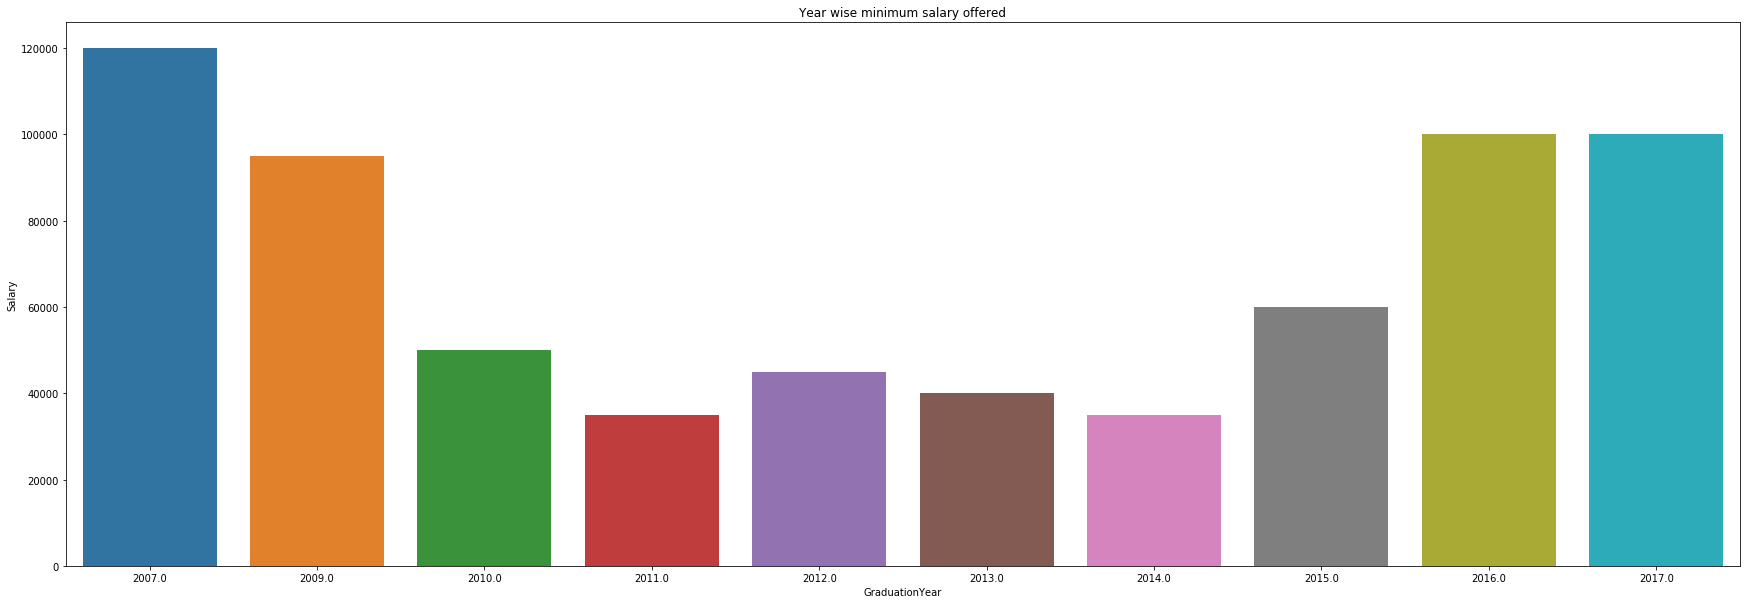

In [828]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='GraduationYear',y='Salary',data=df[['Salary','GraduationYear']].groupby(['GraduationYear'],as_index =False).min().sort_values('Salary',ascending=False))
plt.title('Year wise minimum salary offered');

### Yearly growth of Average Salary

1.   **From 2009 amcat starts offering multiple designation**
2.   **From 2009 to 2010 the average salary that is offered to the candidates shows drastic change**
3.   **In 2011,2014,2016 are the average salary that is offered to candidates goes down it might be due to recession or loss in mass recruiting company stocks**
4.   **2012 and 2013 are the year in which the candidates are offered highest average salary**

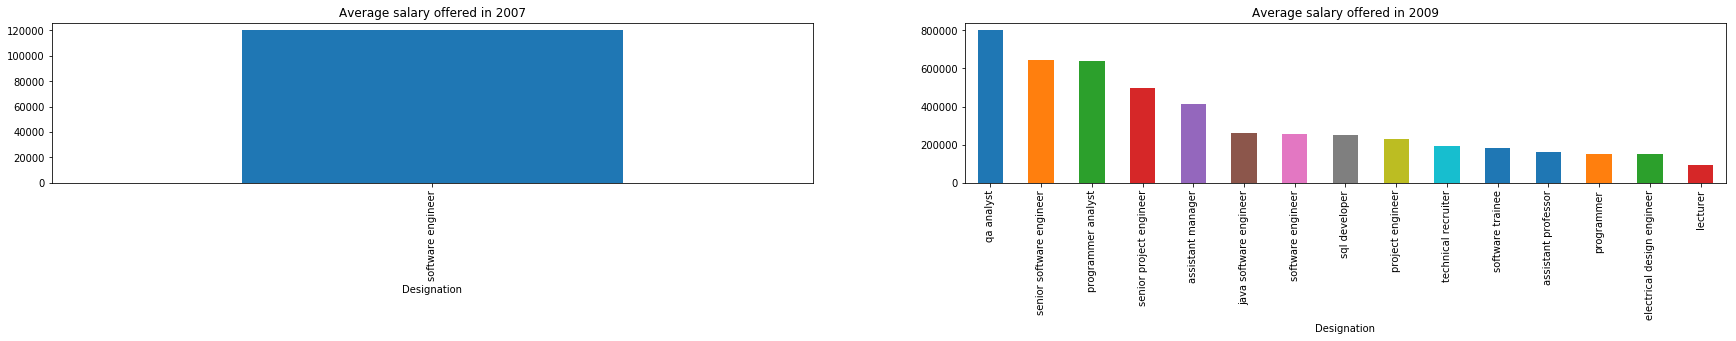

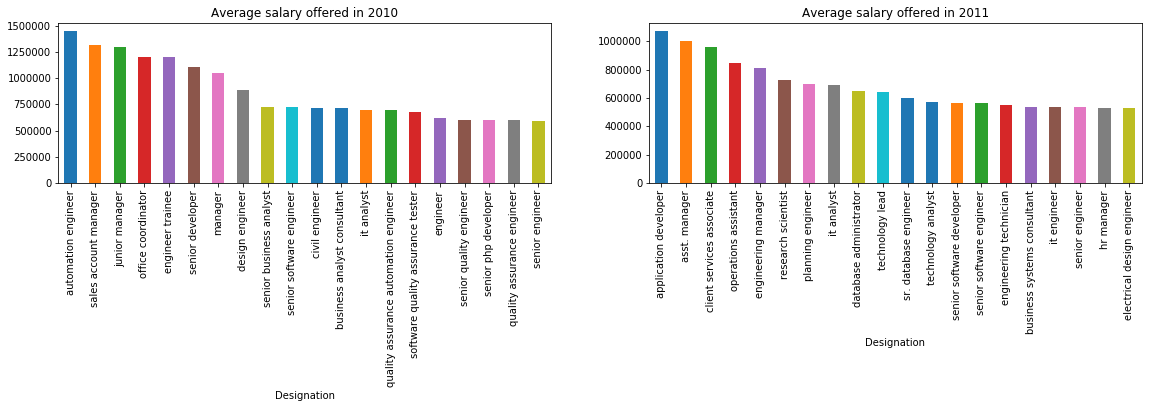

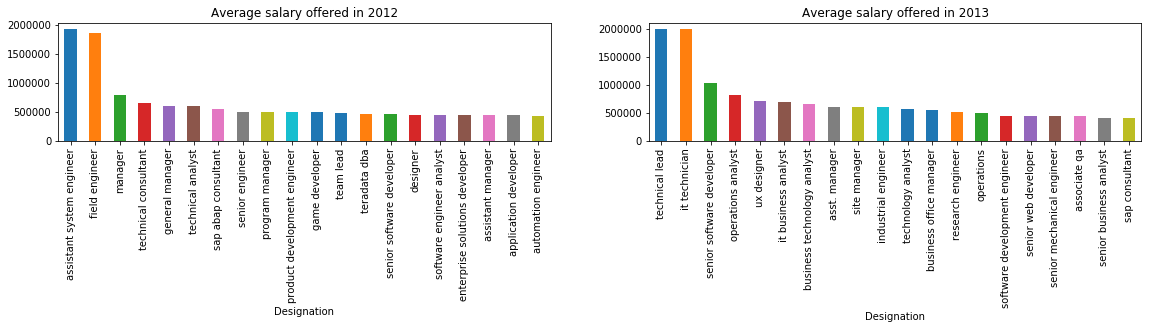

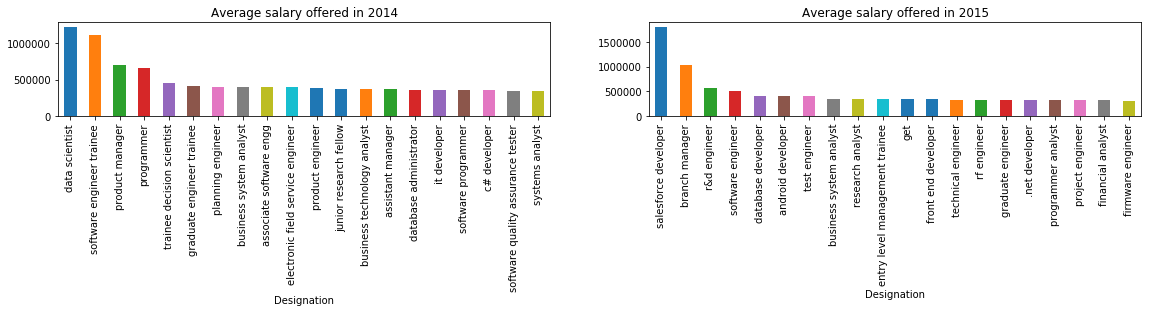

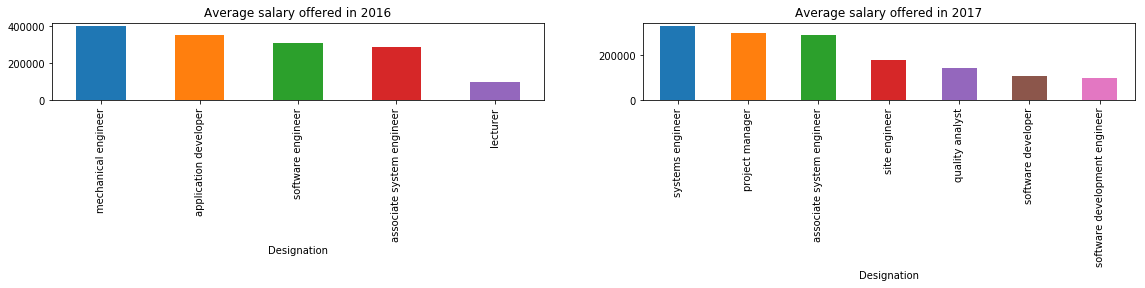

In [829]:
sal_piv = pd.pivot_table(df,values='Salary',columns='GraduationYear',index='Designation',aggfunc='mean')
ig = plt.figure(figsize=(30,10))
plt.subplot(321)
sal_piv[2007].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2007')
plt.subplot(322)
sal_piv[2009].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2009')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(331)
sal_piv[2010].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2010')
plt.subplot(332)
sal_piv[2011].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2011')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(431)
sal_piv[2012].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2012')
plt.subplot(432)
sal_piv[2013].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2013')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(531)
sal_piv[2014].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2014')
plt.subplot(532)
sal_piv[2015].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2015')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(631)
sal_piv[2016].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2016')
plt.subplot(632)
sal_piv[2017].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Average salary offered in 2017')
plt.show()

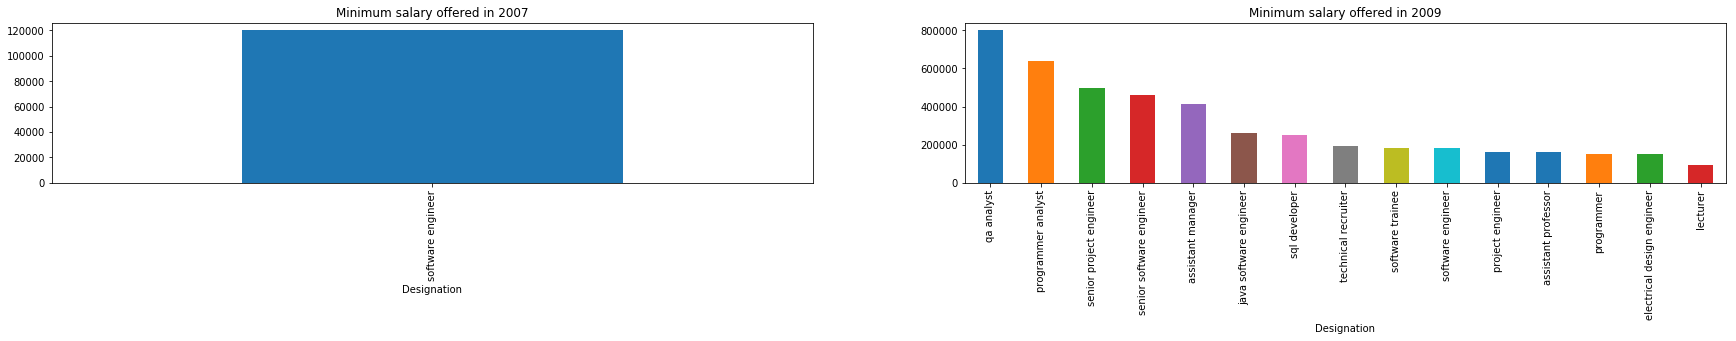

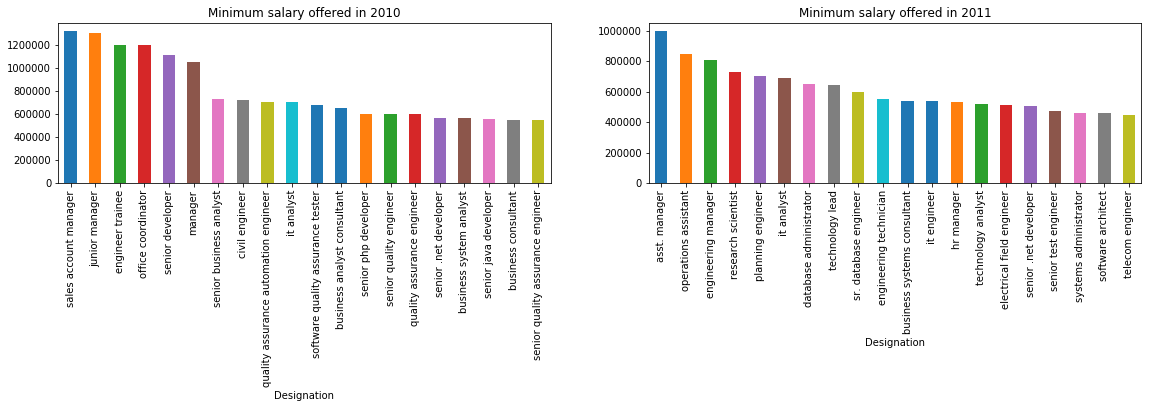

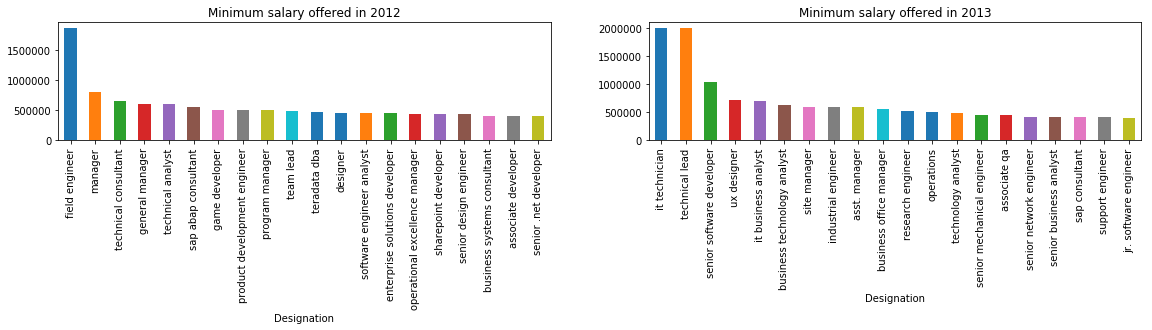

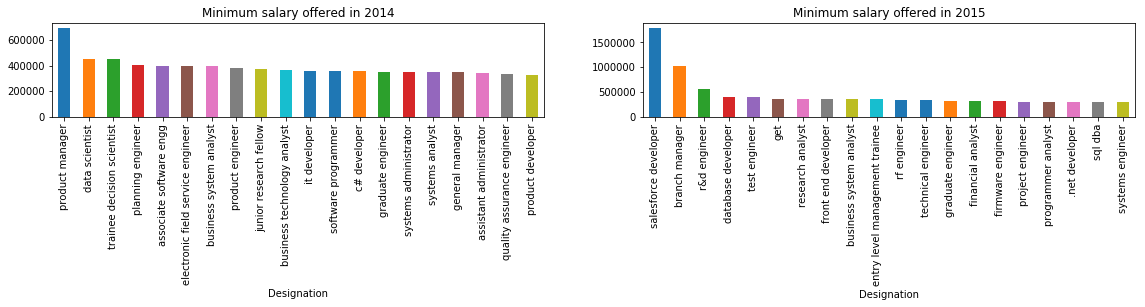

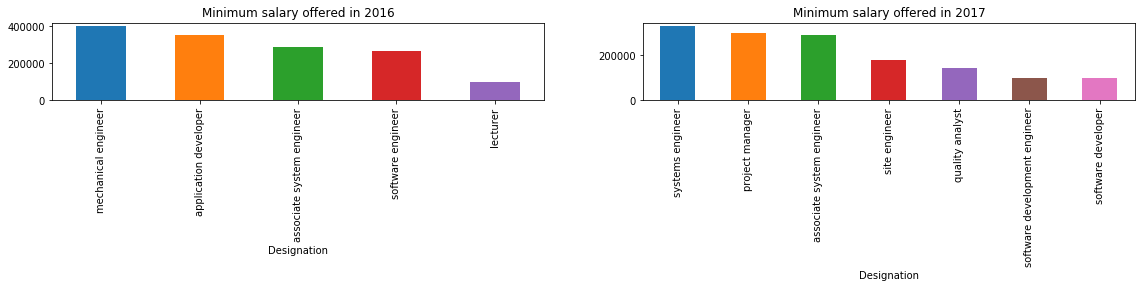

In [830]:
sal_piv_min = pd.pivot_table(df,values='Salary',columns='GraduationYear',index='Designation',aggfunc='min')
ig = plt.figure(figsize=(30,10))
plt.subplot(321)
sal_piv_min[2007].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2007')
plt.subplot(322)
sal_piv_min[2009].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2009')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(331)
sal_piv_min[2010].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2010')
plt.subplot(332)
sal_piv_min[2011].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2011')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(431)
sal_piv_min[2012].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2012')
plt.subplot(432)
sal_piv_min[2013].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2013')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(531)
sal_piv_min[2014].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2014')
plt.subplot(532)
sal_piv_min[2015].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2015')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(631)
sal_piv_min[2016].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2016')
plt.subplot(632)
sal_piv_min[2017].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Minimum salary offered in 2017')
plt.show()

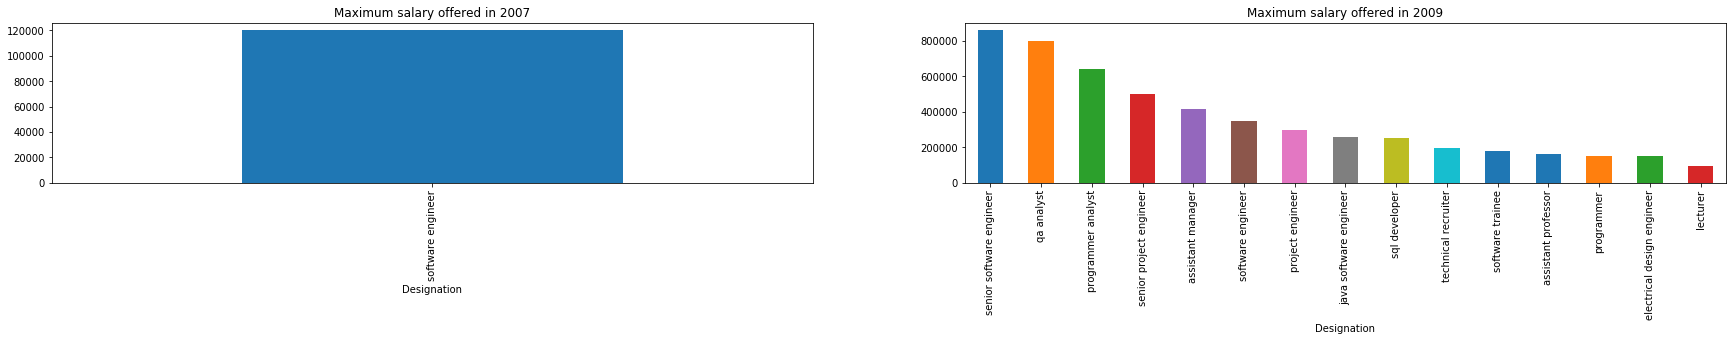

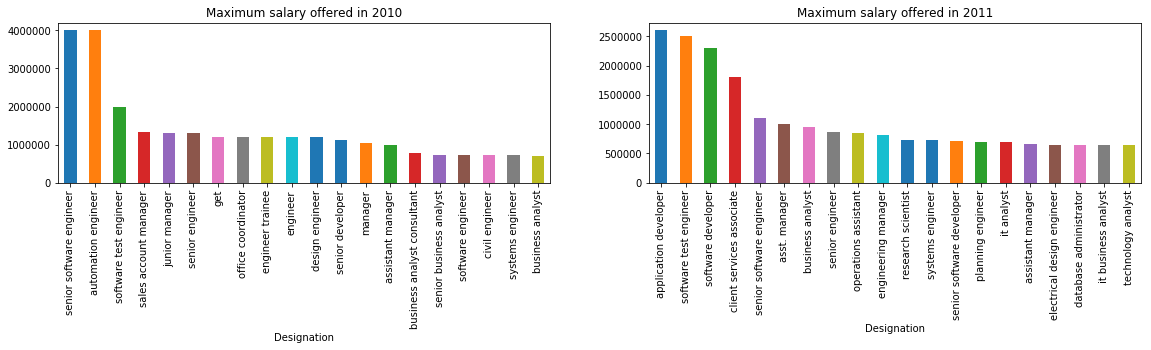

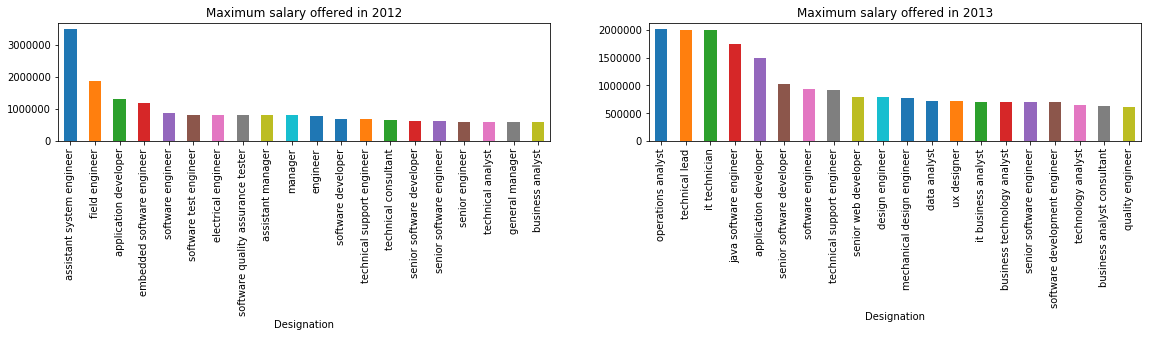

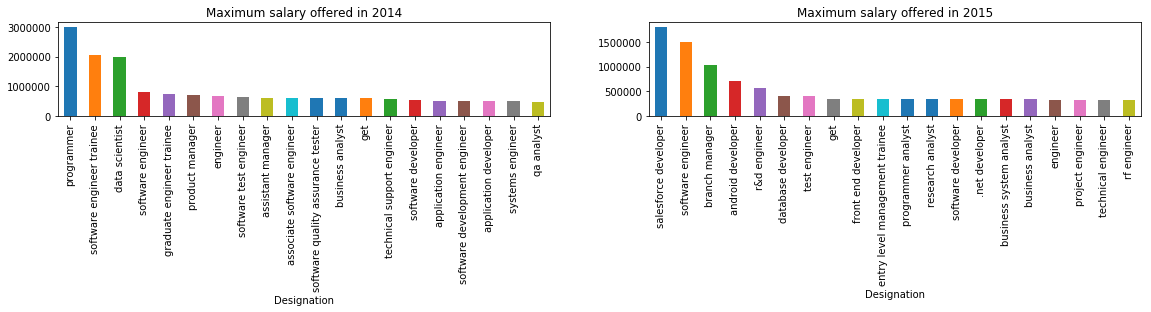

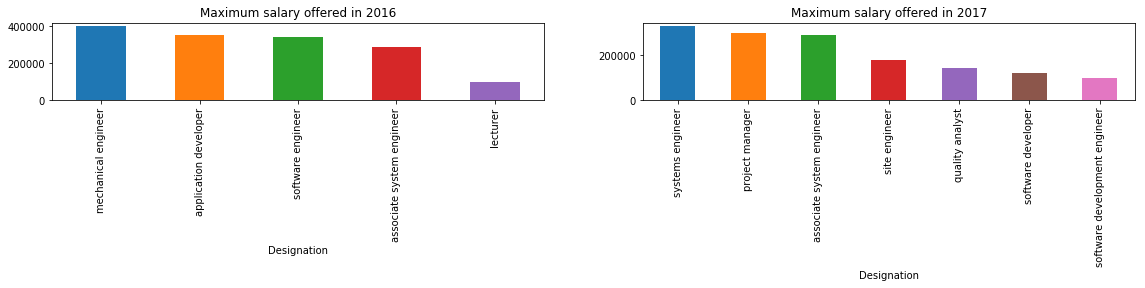

In [831]:
sal_piv_max = pd.pivot_table(df,values='Salary',columns='GraduationYear',index='Designation',aggfunc='max')
ig = plt.figure(figsize=(30,10))
plt.subplot(321)
sal_piv_max[2007].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2007')
plt.subplot(322)
sal_piv_max[2009].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2009')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(331)
sal_piv_max[2010].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2010')
plt.subplot(332)
sal_piv_max[2011].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2011')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(431)
sal_piv_max[2012].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2012')
plt.subplot(432)
sal_piv_max[2013].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2013')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(531)
sal_piv_max[2014].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2014')
plt.subplot(532)
sal_piv_max[2015].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2015')
plt.show()
ig = plt.figure(figsize=(30,10))
plt.subplot(631)
sal_piv_max[2016].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2016')
plt.subplot(632)
sal_piv_max[2017].sort_values(ascending=False).dropna()[:20].plot(kind='bar')
plt.title('Maximum salary offered in 2017')
plt.show()

### Performance v/s Salary

### Degree Score v/s Salary

In [832]:
def gpa(x):
    if x > 10:
        if x/9.5 < 10:
            return round(x/9.5)
        else:
            return 10
    else:
        return round(x)
per_df = df[['collegeGPA','Salary']]  
per_df['gpa'] = per_df['collegeGPA'].apply(gpa)

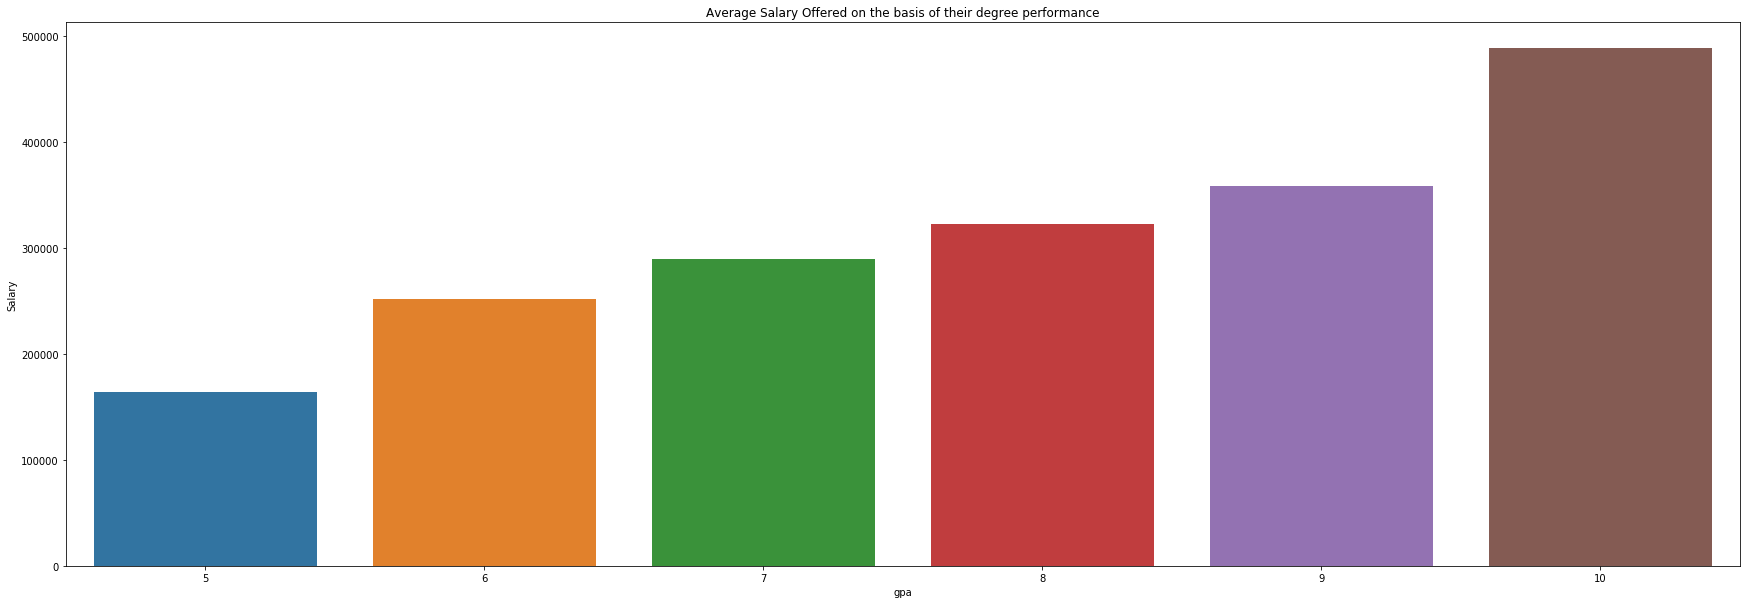

In [833]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='gpa',y='Salary',data=per_df.groupby('gpa',as_index=False).mean())
plt.title('Average Salary Offered on the basis of their degree performance');

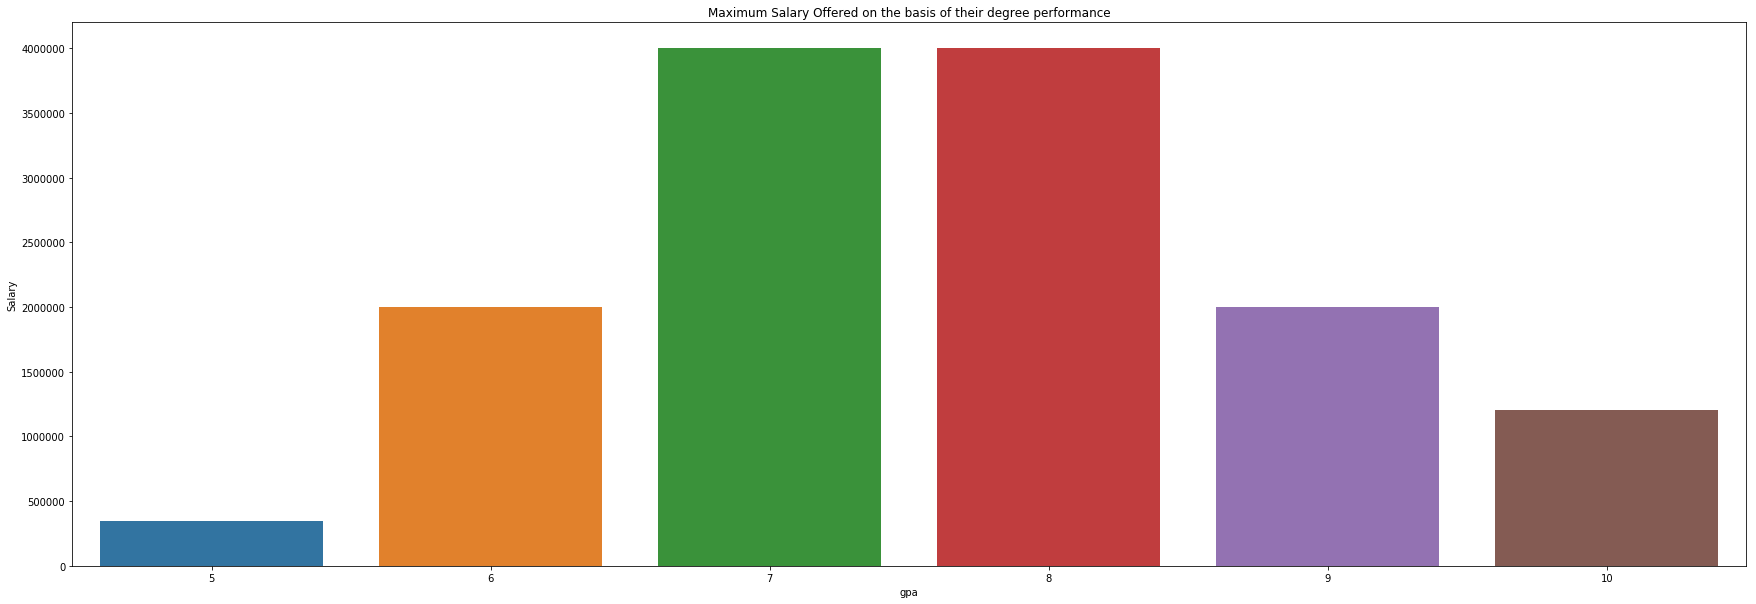

In [834]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='gpa',y='Salary',data=per_df.groupby('gpa',as_index=False).max())
plt.title('Maximum Salary Offered on the basis of their degree performance');

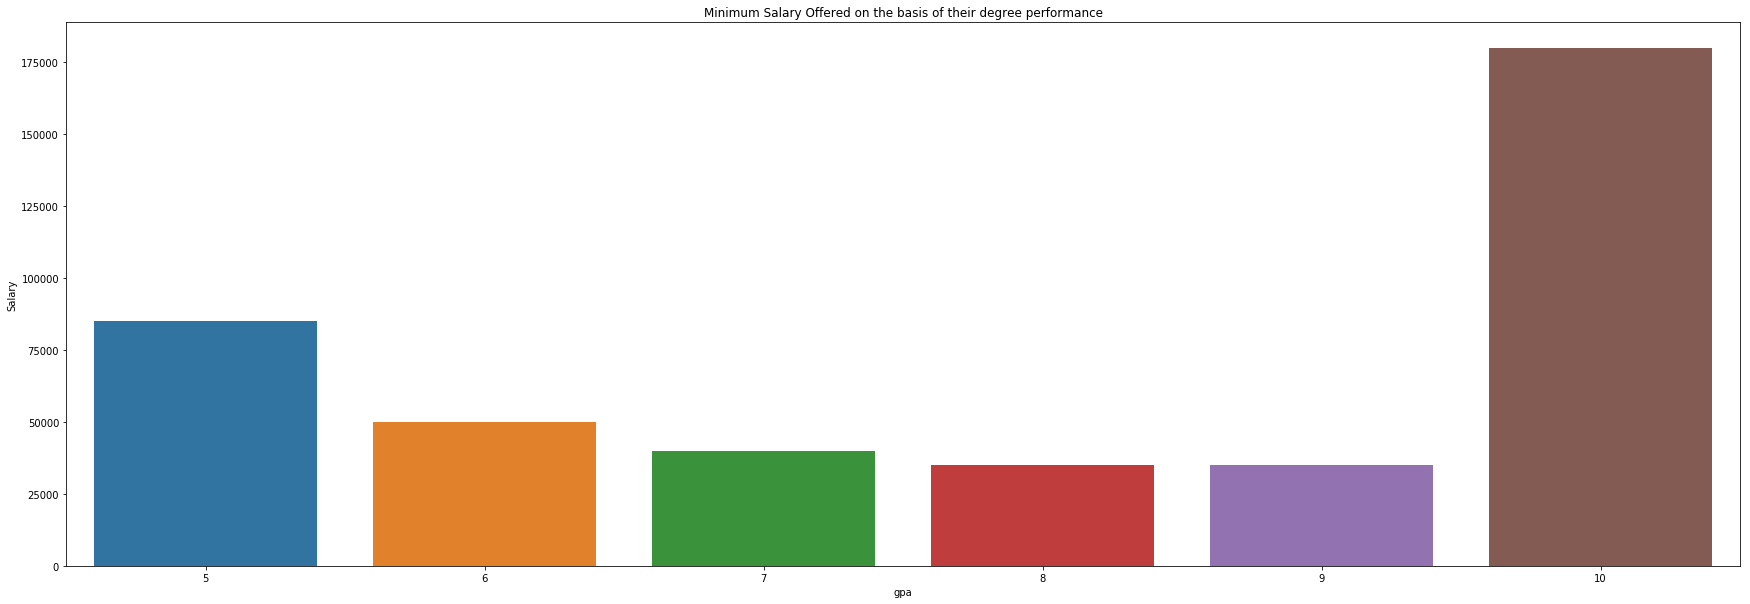

In [835]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='gpa',y='Salary',data=per_df.groupby('gpa',as_index=False).min())
plt.title('Minimum Salary Offered on the basis of their degree performance');

In [836]:
def gpa(x):
    if x > 10:
        if x/9.5 < 10:
            return round(x/9.5,2)
        else:
            return 10
    else:
        return round(x,2)
df['collegeGPA'] = df['collegeGPA'].apply(gpa)

### AMCAT Compulsory Subject Performance v/s Salary

1.   **Candidates scoring more than 600 in all compulsory subject each grabs highest average salary**
2.   **According to the df candidates having average score between 400-500 and 600-700 grabs highest maximum salary**
3.   **Performance of candidates who score between 400 and 600 varies alot because they have grabed highest maximum salary and lowest minimum salary**

In [837]:
marks_necc_df = df[['Salary','English','Logical', 'Quant']]

In [838]:
marks_necc_df['average'] = round((marks_necc_df['English'] + marks_necc_df['Logical'] + marks_necc_df['Quant'])/3,2)

In [839]:
def rng(x):
    return x//100
marks_necc_df['avg'] = marks_necc_df['average'].apply(rng)

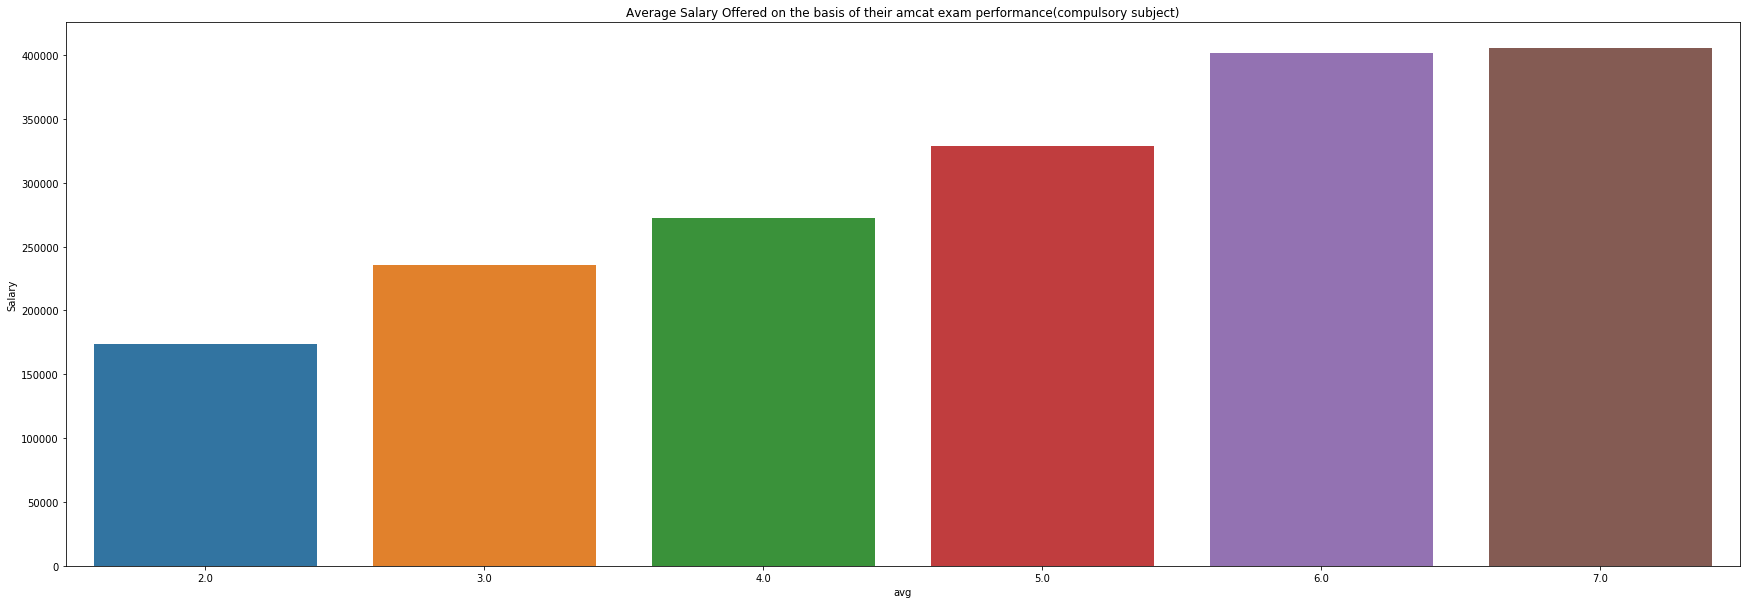

In [840]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='avg',y='Salary',data=marks_necc_df.groupby('avg',as_index=False).mean())
plt.title('Average Salary Offered on the basis of their amcat exam performance(compulsory subject)');

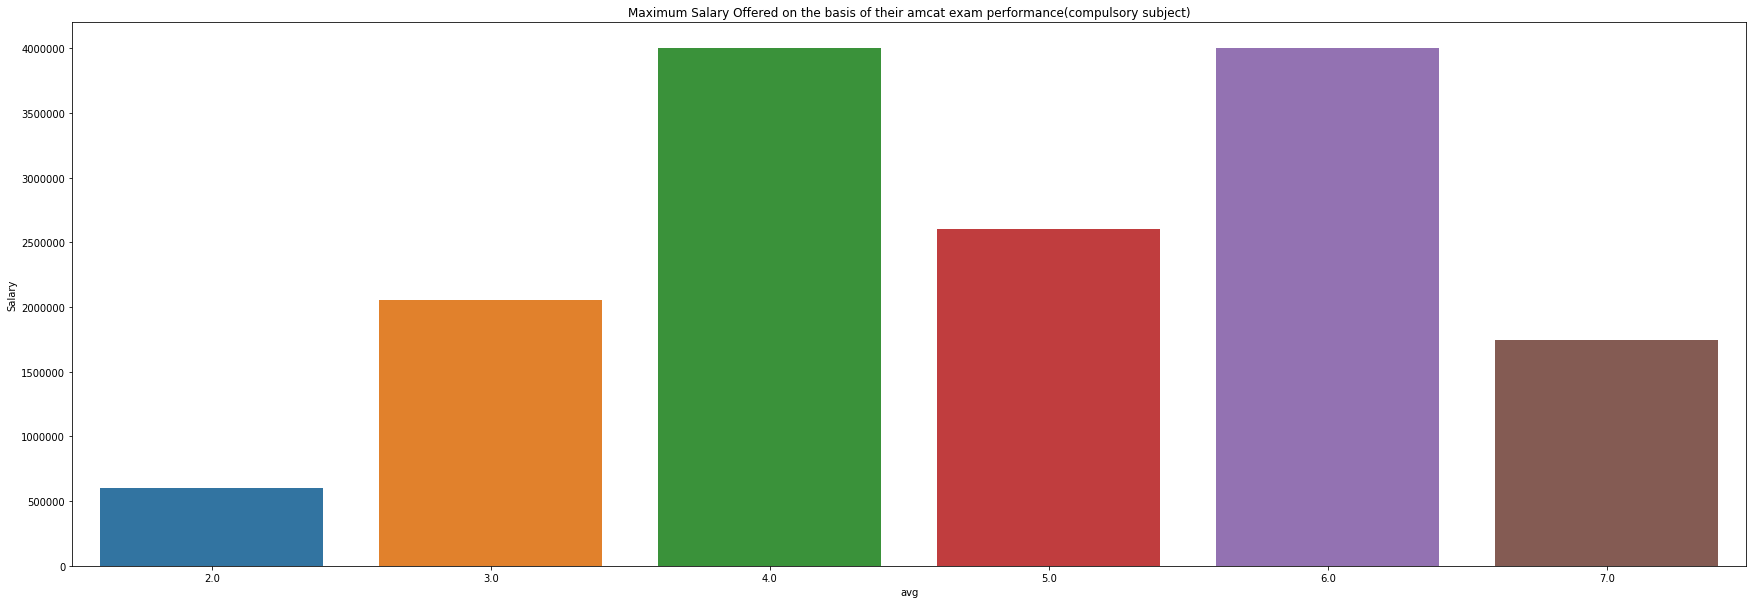

In [841]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='avg',y='Salary',data=marks_necc_df.groupby('avg',as_index=False).max())
plt.title('Maximum Salary Offered on the basis of their amcat exam performance(compulsory subject)');

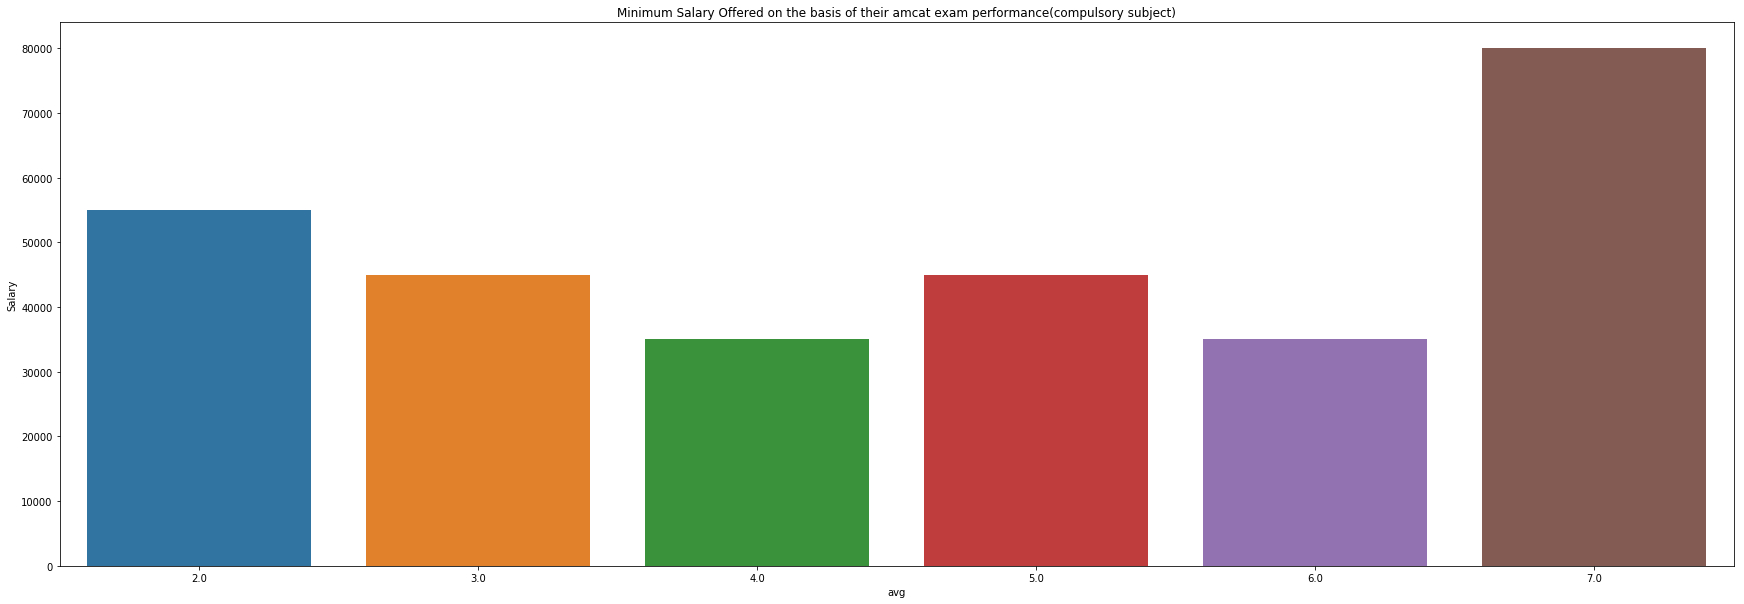

In [842]:
ig = plt.figure(figsize=(30,10))
sns.barplot(x='avg',y='Salary',data=marks_necc_df.groupby('avg',as_index=False).min().reset_index())
plt.title('Minimum Salary Offered on the basis of their amcat exam performance(compulsory subject)');